# <b><div style='padding:25px;background-color:#9B2335;color:white;border-radius:4px;font-size:100%;text-align: center'>Singapore  Resale Flat Prices Prediction<br></div>

# Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import pearsonr,kstest, norm, boxcox
import scipy.stats as stats
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import math
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)  
import pickle

# Reading the Dataset

In [3]:
df_90_99=pd.read_csv(r'dataset\ResaleFlatPricesBasedonApprovalDate19901999.csv')
df_00_12=pd.read_csv(r'dataset\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df_12_14=pd.read_csv(r'dataset\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df_15_16=pd.read_csv(r'dataset\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df_17_=pd.read_csv(r'dataset\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [4]:
df=pd.concat([df_90_99,df_00_12,df_12_14,df_15_16,df_17_], axis=0)

In [5]:
df.sample(10)

month           town flat_type block         street_name  \
9930    2000-05          BEDOK    3 ROOM   620  BEDOK RESERVOIR RD   
248924  2007-11       SENGKANG    4 ROOM  159A      RIVERVALE CRES   
223461  1998-11       TAMPINES    5 ROOM   865      TAMPINES ST 83   
115581  2003-03      WOODLANDS    4 ROOM   509     WOODLANDS DR 14   
256600  2008-03       CLEMENTI    4 ROOM   520       WEST COAST RD   
149644  2004-05      PASIR RIS    4 ROOM   409      PASIR RIS DR 6   
34899   1992-09    BUKIT MERAH    3 ROOM    72          REDHILL RD   
338735  2010-10  MARINE PARADE    3 ROOM    66           MARINE DR   
63105   2001-10     ANG MO KIO    3 ROOM   471   ANG MO KIO AVE 10   
258546  1999-06  CHOA CHU KANG    4 ROOM    25      TECK WHYE LANE   

       storey_range  floor_area_sqm         flat_model  lease_commence_date  \
9930       01 TO 03            61.0           Improved                 1986   
248924     01 TO 03            91.0  Premium Apartment                 2003   
223461     10 TO 12           121.0           IMPROVED                 1989   
115581     10 TO 12           107.0  Premium Apartment                 1999   
256600     04 TO 06            92.0     New Generation                 1986   
149644     01 TO 03           106.0            Model A                 1989   
34899      04 TO 06            54.0           STANDARD                 1969   
338735     10 TO 12            65.0           Improved                 1976   
63105      10 TO 12            82.0     New Generation                 1979   
258546     07 TO 09            92.0     NEW GENERATION                 1979   

        resale_price remaining_lease  
9930        123000.0             NaN  
248924      253000.0             NaN  
223461      360000.0             NaN  
115581      228000.0             NaN  
256600      245000.0             NaN  
149644      260000.0             NaN  
34899        45000.0             NaN  
338735      428000.0             NaN  
63105       190000.0             NaN  
258546      180000.0             NaN

# Understanding the Dataset

In [6]:
print(df.shape)
df.sample(4)

(927465, 11)


month             town flat_type block        street_name  \
72958   1994-07      BUKIT BATOK    4 ROOM     6       HILLVIEW AVE   
157148  2004-08        WOODLANDS    5 ROOM   532    WOODLANDS DR 14   
291787  2009-06        WOODLANDS    4 ROOM   844    WOODLANDS AVE 4   
183849  2005-07  KALLANG/WHAMPOA    3 ROOM     7  ST. GEORGE'S LANE   

       storey_range  floor_area_sqm         flat_model  lease_commence_date  \
72958      04 TO 06            92.0     NEW GENERATION                 1978   
157148     04 TO 06           126.0  Premium Apartment                 1999   
291787     01 TO 03           107.0            Model A                 1996   
183849     10 TO 12            69.0           Improved                 1986   

        resale_price remaining_lease  
72958       173000.0             NaN  
157148      286000.0             NaN  
291787      268000.0             NaN  
183849      163000.0             NaN

In [7]:
print(df.dtypes,'\n\n')
df.info()


month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object 


<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927465 non-null  object 
 1   town                 927465 non-null  object 
 2   flat_type            927465 non-null  object 
 3   block                927465 non-null  object 
 4   street_name          927465 non-null  object 
 5   storey_range         927465 non-null  object 
 6   floor_area_sqm       927465 non-null  float64
 7   flat_model           927465 non-null  object 
 8   lease_commence_date  

# Checking Null Values

In [8]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

# Updating Data types

In [10]:
df['town'] = df['town'].astype('category')
df['flat_type'] = df['flat_type'].astype('category') 
df['block'] = df['block'].astype('category')
df['street_name'] = df['street_name'].astype('category') 
df['storey_range'] = df['storey_range'].astype('category')
df['flat_model'] = df['flat_model'].astype('category')
df['remaining_lease'] = df['remaining_lease'].astype('category')

In [11]:
for i in df.select_dtypes(include='number'):
    print(f'{i}- Min {df[i].min()}---, Max {df[i].max()} ')

floor_area_sqm- Min 28.0---, Max 307.0 
lease_commence_date- Min 1966---, Max 2020 
resale_price- Min 5000.0---, Max 1588000.0 


In [12]:
df['floor_area_sqm'] = df['floor_area_sqm'].astype('float32')
df['lease_commence_date'] = df['lease_commence_date'].astype('int32')
df['month'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')


In [13]:
for i in df.select_dtypes(exclude='number'):
    print(f'{i}- {df[i].value_counts().count()}\n ')

month- 414
 
town- 27
 
flat_type- 8
 
block- 2711
 
street_name- 584
 
storey_range- 25
 
flat_model- 34
 
remaining_lease- 726
 


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                927465 non-null  datetime64[ns]
 1   town                 927465 non-null  category      
 2   flat_type            927465 non-null  category      
 3   block                927465 non-null  category      
 4   street_name          927465 non-null  category      
 5   storey_range         927465 non-null  category      
 6   floor_area_sqm       927465 non-null  float32       
 7   flat_model           927465 non-null  category      
 8   lease_commence_date  927465 non-null  int32         
 9   resale_price         927465 non-null  float64       
 10  remaining_lease      218415 non-null  category      
dtypes: category(7), datetime64[ns](1), float32(1), float64(1), int32(1)
memory usage: 37.3 MB


In [15]:
df.describe().T

count                           mean  \
month                  927465  2006-08-20 18:43:29.075706368   
floor_area_sqm       927465.0                      95.691246   
lease_commence_date  927465.0                    1988.278012   
resale_price         927465.0                  320848.058806   

                                     min                  25%  \
month                1990-01-01 00:00:00  1999-01-01 00:00:00   
floor_area_sqm                      28.0                 73.0   
lease_commence_date               1966.0               1981.0   
resale_price                      5000.0             193000.0   

                                     50%                  75%  \
month                2005-04-01 00:00:00  2014-03-01 00:00:00   
floor_area_sqm                      93.0                113.0   
lease_commence_date               1986.0               1996.0   
resale_price                    297500.0             418000.0   

                                     max            std  
month                2024-06-01 00:00:00            NaN  
floor_area_sqm                     307.0      25.824986  
lease_commence_date               2020.0      10.664813  
resale_price                   1588000.0  170522.857301

### Checking Categorical feature classification

In [16]:
for i in df.select_dtypes(exclude='number'):
    print('-----'*10,'\n',df[i].value_counts().reset_index().sort_values(by=i,ascending=True),'\n','-----'*10)

-------------------------------------------------- 
          month  count
331 1990-01-01   1507
401 1990-02-01    931
379 1990-03-01   1150
395 1990-04-01   1047
410 1990-05-01    778
..         ...    ...
228 2024-02-01   2125
237 2024-03-01   2049
161 2024-04-01   2377
123 2024-05-01   2511
411 2024-06-01    427

[414 rows x 2 columns] 
 --------------------------------------------------
-------------------------------------------------- 
                town  count
5        ANG MO KIO  52090
3             BEDOK  66677
20           BISHAN  21271
7       BUKIT BATOK  44429
9       BUKIT MERAH  34383
16    BUKIT PANJANG  27708
25      BUKIT TIMAH   2519
24     CENTRAL AREA   7150
8     CHOA CHU KANG  38348
15         CLEMENTI  28040
14          GEYLANG  28179
6           HOUGANG  50772
18      JURONG EAST  24796
2       JURONG WEST  66715
17  KALLANG/WHAMPOA  27199
26     LIM CHU KANG     64
23    MARINE PARADE   8041
10        PASIR RIS  33237
21          PUNGGOL  20665
13       QUEE

Flat Type and Flat Model has text inconsostency. 

### Cleaning Text inconsistency

In [17]:
df['town'] = df['town'].str.strip().str.title().astype('category')
df['town'] = df['town'].astype('category')
df['town'].value_counts().reset_index().sort_values(by='town')

town  count
5        Ang Mo Kio  52090
3             Bedok  66677
20           Bishan  21271
7       Bukit Batok  44429
9       Bukit Merah  34383
16    Bukit Panjang  27708
25      Bukit Timah   2519
24     Central Area   7150
8     Choa Chu Kang  38348
15         Clementi  28040
14          Geylang  28179
6           Hougang  50772
18      Jurong East  24796
2       Jurong West  66715
17  Kallang/Whampoa  27199
26     Lim Chu Kang     64
23    Marine Parade   8041
10        Pasir Ris  33237
21          Punggol  20665
13       Queenstown  28784
22        Sembawang  13869
11         Sengkang  32488
19        Serangoon  22835
0          Tampines  80005
12        Toa Payoh  31541
4         Woodlands  65563
1            Yishun  70097

In [18]:
df['flat_type'].cat.categories.unique()

Index(['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'],
      dtype='object')

In [19]:
df['flat_type'] = df['flat_type'].cat.rename_categories({'MULTI-GENERATION':'Multi Generation'})
df['flat_type'] = df['flat_type'].str.strip().str.title().astype('category')
df['flat_type'] = df['flat_type'].astype('category')
df['flat_type'].value_counts().reset_index().sort_values(by='flat_type')

flat_type   count
5            1 Room    1304
4            2 Room   11841
1            3 Room  296064
0            4 Room  352489
2            5 Room  195520
3         Executive   69704
6  Multi Generation     543

In [20]:
df['street_name'] = df['street_name'].str.strip().str.title().astype('category')
df['street_name'] = df['street_name'].astype('category')
df['street_name'].value_counts().reset_index().sort_values(by='street_name')

street_name  count
141    Admiralty Dr   2370
225  Admiralty Link   1498
521      Ah Hood Rd    185
565    Alexandra Rd     59
583  Aljunied Ave 2      1
..              ...    ...
384   Yung Kuang Rd    530
468     Yung Loh Rd    299
387    Yung Ping Rd    515
429   Yung Sheng Rd    408
447         Zion Rd    354

[584 rows x 2 columns]

In [21]:
df['flat_model'] = df['flat_model'].str.strip().str.title().astype('category')
df['flat_model'].value_counts().reset_index().sort_values(by='flat_model')

flat_model   count
16                  2-Room     138
20                    3Gen      32
11           Adjoined Flat    1250
6                Apartment   35504
9                     Dbss    3308
1                 Improved  241907
17     Improved-Maisonette     126
7               Maisonette   29681
0                  Model A  265265
10      Model A-Maisonette    2078
8                 Model A2   10142
13        Multi Generation     543
2           New Generation  189023
4        Premium Apartment   46812
18  Premium Apartment Loft     108
19      Premium Maisonette      86
3               Simplified   57560
5                 Standard   42554
12                 Terrace     694
14                 Type S1     437
15                 Type S2     217

In [22]:
df['Avg_storey_range']= df['storey_range'].apply(lambda x: (int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2) 
df['Avg_storey_range'] = df['Avg_storey_range'].astype('int8')

In [23]:
df.sample(4)

month     town flat_type block         street_name storey_range  \
4350   2015-04-01  Hougang    3 Room   119       Hougang Ave 1     04 TO 06   
98565  2002-09-01  Hougang    3 Room   696       Hougang St 61     10 TO 12   
40939  1993-01-01   Yishun    4 Room   146        Yishun St 11     01 TO 03   
189939 1998-04-01  Geylang    5 Room   125  Geylang East Ave 1     07 TO 09   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
4350              67.0  New Generation                 1981      285000.0   
98565             74.0         Model A                 1987      158000.0   
40939             96.0  New Generation                 1985       65000.0   
189939           132.0         Model A                 1984      477000.0   

       remaining_lease  Avg_storey_range  
4350                65                 5  
98565              NaN                11  
40939              NaN                 2  
189939             NaN                 8

In [24]:
df.Avg_storey_range.value_counts()

Avg_storey_range
5     232709
8     212720
2     186466
11    178899
14     62059
17     24174
20     11441
23      7535
26      3445
3       2700
29      1647
13      1259
32       631
35       577
38       516
18       265
41       246
44        65
47        53
28        39
50        17
33         2
Name: count, dtype: int64

## Features Details and Types

1. Month - Month of sale of the property
2. Town - Property Location
3. Flat Type - Property Classification
5. Block - Building contains multiple units/flats
6. Street Name - Property Location
7. Storey Range - Estimated range of floors the unit sold was located on
8. Floor Area SQM - Total Estimated space measured in square meters
9. Flat Model - Classification of units by generation of which the flat was made, ranging from New Generation, DBSS, Improved, Apartment
10. Lease Commence Date - Starting point of a lease agreement, marking the beginning of the lease term during which the tenant has the right to use and occupy the leased property
11. Resale Price - Cost of the flat sold
12. Remaining Lease

In [25]:
print(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                927465 non-null  datetime64[ns]
 1   town                 927465 non-null  category      
 2   flat_type            927465 non-null  category      
 3   block                927465 non-null  category      
 4   street_name          927465 non-null  category      
 5   storey_range         927465 non-null  category      
 6   floor_area_sqm       927465 non-null  float32       
 7   flat_model           927465 non-null  category      
 8   lease_commence_date  927465 non-null  int32         
 9   resale_price         927465 non-null  float64       
 10  remaining_lease      218415 non-null  category      
 11  Avg_storey_range     927465 non-null  int8          
dtypes: category(7), datetime64[ns](1), float32(1), float64(1), int32(1), int8(1)


month           town flat_type block     street_name storey_range  \
316418 2010-03-01  Marine Parade    5 Room    78       Marine Dr     04 TO 06   
18766  2016-01-01       Tampines    3 Room   221  Tampines St 24     04 TO 06   
178943 1998-01-01    Bukit Batok    4 Room   227   Bt Batok Ctrl     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
316418           117.0        Standard                 1977      583000.0   
18766             73.0         Model A                 1984      320000.0   
178943            93.0  New Generation                 1985      253000.0   

       remaining_lease  Avg_storey_range  
316418             NaN                 5  
18766               67                 5  
178943             NaN                 5

In [26]:
print(df.isnull().sum(),'\n\n',df.isna().sum())

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
Avg_storey_range            0
dtype: int64 

 month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
Avg_storey_range            0
dtype: int64


In [27]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'Avg_storey_range'],
      dtype='object')

In [28]:
num=df.select_dtypes(include=['number']).columns
for col in num:
    print(f"{col} -  {(df[col] <= 0).sum()}")

floor_area_sqm -  0
lease_commence_date -  0
resale_price -  0
Avg_storey_range -  0


In [29]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'Avg_storey_range'],
      dtype='object')

# Feature Engineering

## Deriving new features

In [30]:
def add_floor_area_category(df, num_bins=4):
    # Create the binned feature
    df['floor_area_category'] = pd.qcut(df['floor_area_sqm'], q=num_bins, labels=['Small', 'Medium', 'Large', 'Very Large'])
    
    # Print out the bin ranges for reference
    bins = pd.qcut(df['floor_area_sqm'], q=num_bins, retbins=True)[1]
    print("Floor area category ranges:")
    for i in range(len(bins)-1):
        print(f"{['Small', 'Medium', 'Large', 'Very Large'][i]}: {bins[i]:.2f} - {bins[i+1]:.2f} sqm")
    
    return df

In [31]:
df = add_floor_area_category(df)

Floor area category ranges:
Small: 28.00 - 73.00 sqm
Medium: 73.00 - 93.00 sqm
Large: 93.00 - 113.00 sqm
Very Large: 113.00 - 307.00 sqm


In [32]:
if 'floor_area_sqm' in df.columns:
  # Avoid division by zero (if floor area is zero)
  df['price_per_sqm'] = np.where(df['floor_area_sqm'] > 0, df['resale_price'] / df['floor_area_sqm'], np.nan)
else:
  df['price_per_sqm'] = np.nan  # Handle missing floor area

In [33]:
df['year'] = df['month'].dt.year
df['month_number'] = df['month'].dt.month
df['full_address'] = df['block'].astype(str) + " " + df['street_name'].astype(str) + " " + df['town'].astype(str)
df['full_address'] = df['full_address'].astype('category')

In [34]:
df['remaining_lease_year'] = df['lease_commence_date'] + 99 - df['month'].dt.year

In [35]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'Avg_storey_range', 'floor_area_category',
       'price_per_sqm', 'year', 'month_number', 'full_address',
       'remaining_lease_year'],
      dtype='object')

In [36]:
df.sample(5)

month         town flat_type block         street_name  \
315666 2010-03-01     Clementi    4 Room   707  Clementi West St 2   
368727 2012-02-01  Jurong West    4 Room   258         Boon Lay Dr   
133798 2003-11-01    Pasir Ris    4 Room   633      Pasir Ris Dr 3   
41457  1993-02-01     Clementi    3 Room   713  Clementi West St 2   
249829 1999-04-01     Tampines    4 Room   818      Tampines St 81   

       storey_range  floor_area_sqm      flat_model  lease_commence_date  \
315666     01 TO 03            91.0  New Generation                 1980   
368727     07 TO 09           115.0         Model A                 1995   
133798     10 TO 12           104.0         Model A                 1995   
41457      10 TO 12            67.0  New Generation                 1985   
249829     04 TO 06           108.0         Model A                 1984   

        resale_price remaining_lease  Avg_storey_range floor_area_category  \
315666      337000.0             NaN                 2              Medium   
368727      450000.0             NaN                 8          Very Large   
133798      248800.0             NaN                11               Large   
41457        47000.0             NaN                11               Small   
249829      260000.0             NaN                 5               Large   

        price_per_sqm  year  month_number                     full_address  \
315666    3703.296703  2010             3  707 Clementi West St 2 Clementi   
368727    3913.043478  2012             2      258 Boon Lay Dr Jurong West   
133798    2392.307692  2003            11     633 Pasir Ris Dr 3 Pasir Ris   
41457      701.492537  1993             2  713 Clementi West St 2 Clementi   
249829    2407.407407  1999             4      818 Tampines St 81 Tampines   

        remaining_lease_year  
315666                    69  
368727                    82  
133798                    91  
41457                     91  
249829                    84

In [37]:
df1=df[['town', 'flat_type','floor_area_sqm','storey_range', 'flat_model', 'lease_commence_date',
        'resale_price','floor_area_category','price_per_sqm', 'year','month_number', 
        'full_address', 'remaining_lease_year']].copy()

In [38]:
df1.dtypes

town                    category
flat_type               category
floor_area_sqm           float32
storey_range            category
flat_model              category
lease_commence_date        int32
resale_price             float64
floor_area_category     category
price_per_sqm            float64
year                       int32
month_number               int32
full_address            category
remaining_lease_year       int32
dtype: object

In [45]:
continuous = ['floor_area_sqm', 'resale_price','price_per_sqm']
# discrete = ['lease_commence_date', 'year', 'month_number']
# nominal = ['month', 'town', 'flat_type', 'block', 'street_name', 'flat_model', 'full_address']
# ordinal = ['storey_range', 'remaining_lease']
categorical = ['year','month_number' ,'town', 'flat_type',
       'flat_model','storey_range','lease_commence_date','remaining_lease_year','floor_area_category']

## Exploratory Data Analysis. Before Handling Skewness and Outliers

In [40]:
def univar_num(df, col):
    plt.figure(figsize=(16, 8))
    df = df.dropna(subset=[col])


    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode()[0]

    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x=col, kde=True, bins=50,color='maroon',fill=True)
    plt.title(f'Histogram for {col}')
    plt.axvline(mean, color='maroon', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='darkgreen', label='Mode')
    
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, x=col, color='lightgrey',legend=True)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot for {col}')
    plt.axvline(mean, color='maroon', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='darkgreen', label='Mode')
    plt.legend()
    plt.tight_layout()

    
    plt.subplot(2, 3, 3)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.gca().get_lines()[1].set_color('maroon')
    plt.gca().get_lines()[0].set_color('darkgreen')
    plt.title(f'QQ Plot for {col}')

    plt.tight_layout()
    
    plt.tight_layout()
    plt.show()

### Numerical features Distribution

In [41]:
df1.describe().T

count           mean            std          min  \
floor_area_sqm        927465.0      95.691246      25.824986    28.000000   
lease_commence_date   927465.0    1988.278012      10.664813  1966.000000   
resale_price          927465.0  320848.058806  170522.857301  5000.000000   
price_per_sqm         927465.0    3318.137732    1532.133749   161.290323   
year                  927465.0    2006.174394       9.324771  1990.000000   
month_number          927465.0       6.550482       3.413028     1.000000   
remaining_lease_year  927465.0      81.103618      10.717863    41.000000   

                               25%            50%       75%           max  
floor_area_sqm            73.00000      93.000000     113.0  3.070000e+02  
lease_commence_date     1981.00000    1986.000000    1996.0  2.020000e+03  
resale_price          193000.00000  297500.000000  418000.0  1.588000e+06  
price_per_sqm           2292.26087    2956.521739    4200.0  1.559140e+04  
year                    1999.00000    2005.000000    2014.0  2.024000e+03  
month_number               4.00000       7.000000      10.0  1.200000e+01  
remaining_lease_year      74.00000      83.000000      90.0  1.010000e+02

In [42]:
def kurtosis_color(kurt_val):
    if -1 <= kurt_val <= 1:
        kurt_color = color_good  # Dark Green for near-zero kurtosis (good)
    elif 1 < kurt_val <= 3 or -3 <= kurt_val < -1:
        kurt_color = color_okay  # Yellow for moderate kurtosis
    else:  # kurt_val > 3 or kurt_val < -3
        kurt_color = color_bad  # Maroon for extreme kurtosis
    return kurt_color

def skewness_color(skew_val):
    if -0.5 <= skew_val <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skew_val <= 0.5 or -0.5 < skew_val < 0:
        color = color_okay  # Light Green for slightly positive or slightly negative skew
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
    return color

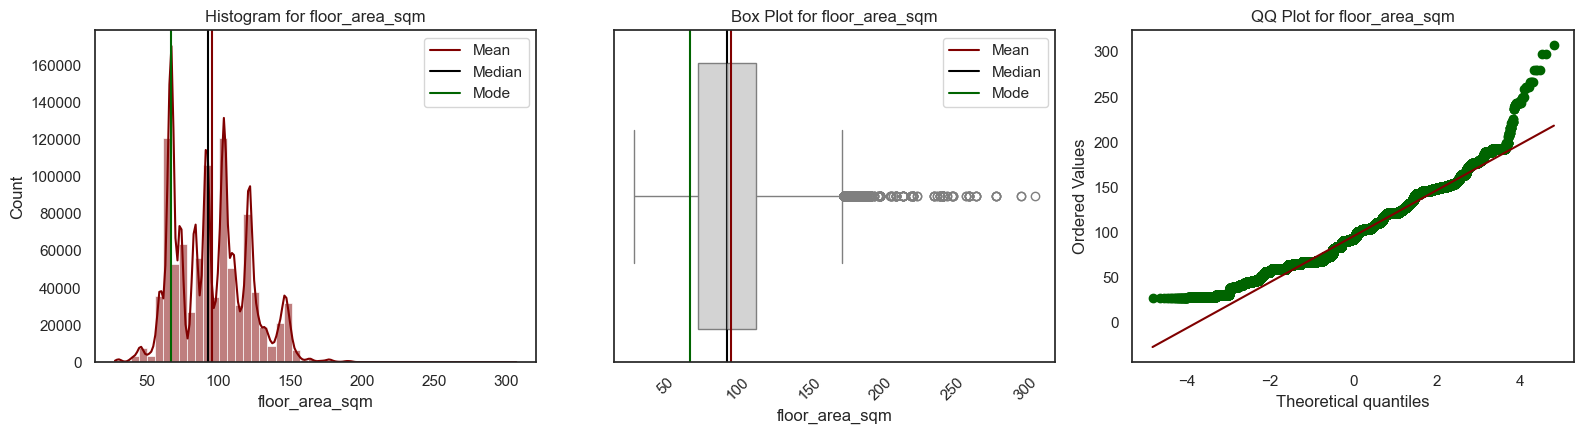



Skew for floor_area_sqm is 0.3661
Kurtosis for floor_area_sqm is -0.3464




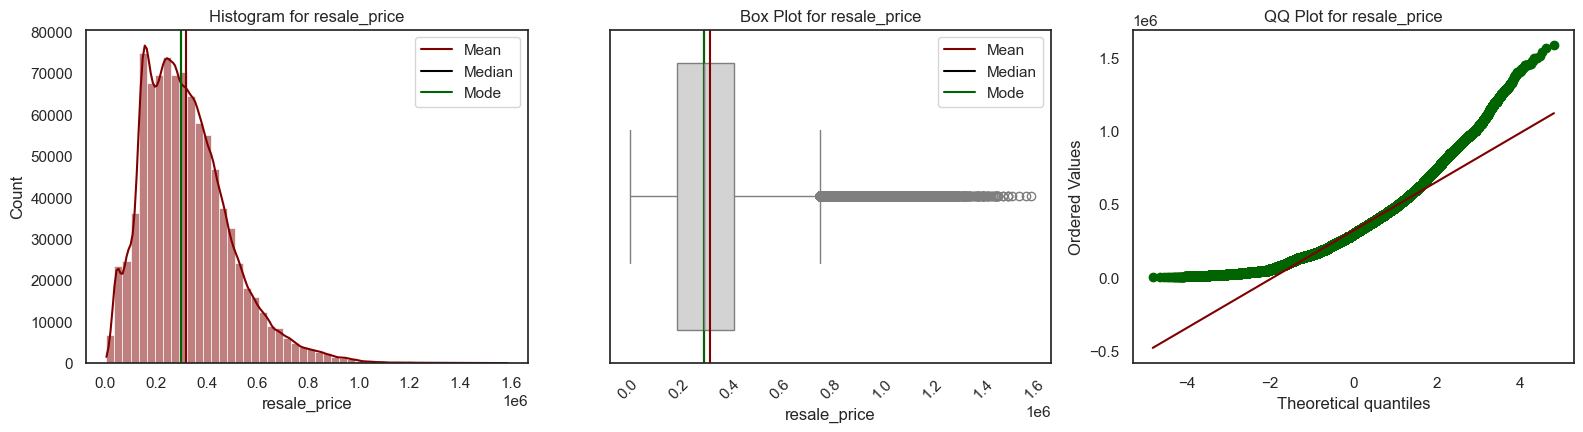



Skew for resale_price is 0.9422
Kurtosis for resale_price is 1.3735




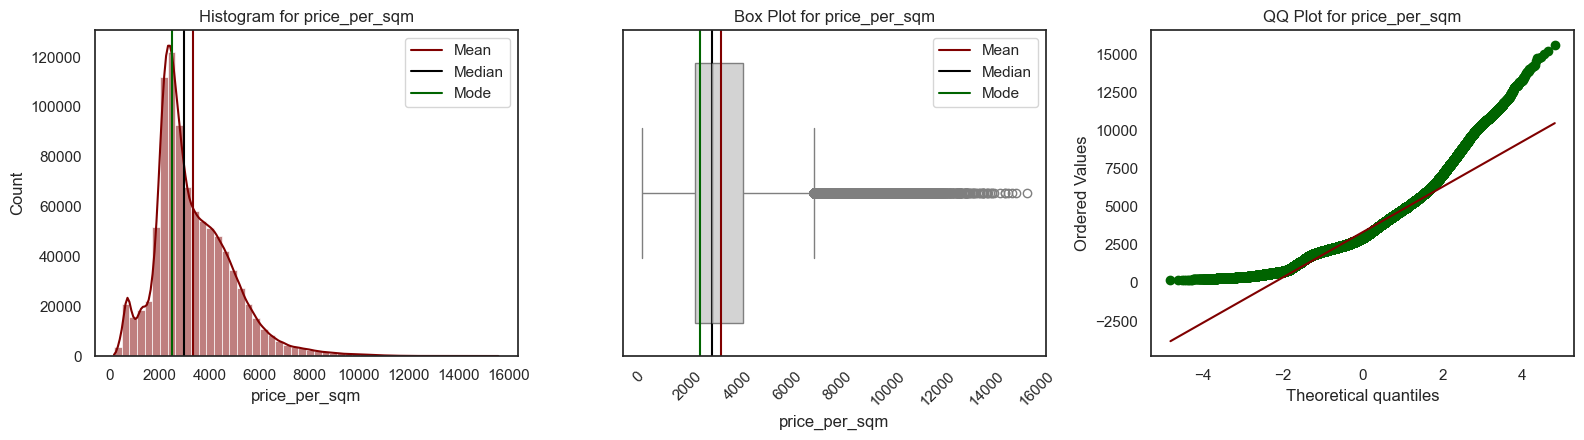



Skew for price_per_sqm is 1.0728
Kurtosis for price_per_sqm is 2.0849




In [43]:
color_good = '\033[32m'   # Dark Green for near-zero skew
color_okay = '\033[92m'   # Light Green for slightly positive or slightly negative skew
color_bad = '\033[91m'    # Maroon for significant skew
color_neutral = '\033[0m' # Reset color

skewed_col = []

sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)  

for i in continuous:
    univar_num(df1,i) 
    skew_val = df1[i].skew()
    kurt=df1[i].kurtosis()
    kurt_color = kurtosis_color(kurt)
    color = skewness_color(skew_val)
    skewed_col.append(i)

    print(f"\n\n{color}Skew for {i} is {skew_val:.4f}{color_neutral}")
    print(f"{color}Kurtosis for {i} is {kurt:.4f}{color_neutral}\n\n")

### Categorical features Distribution

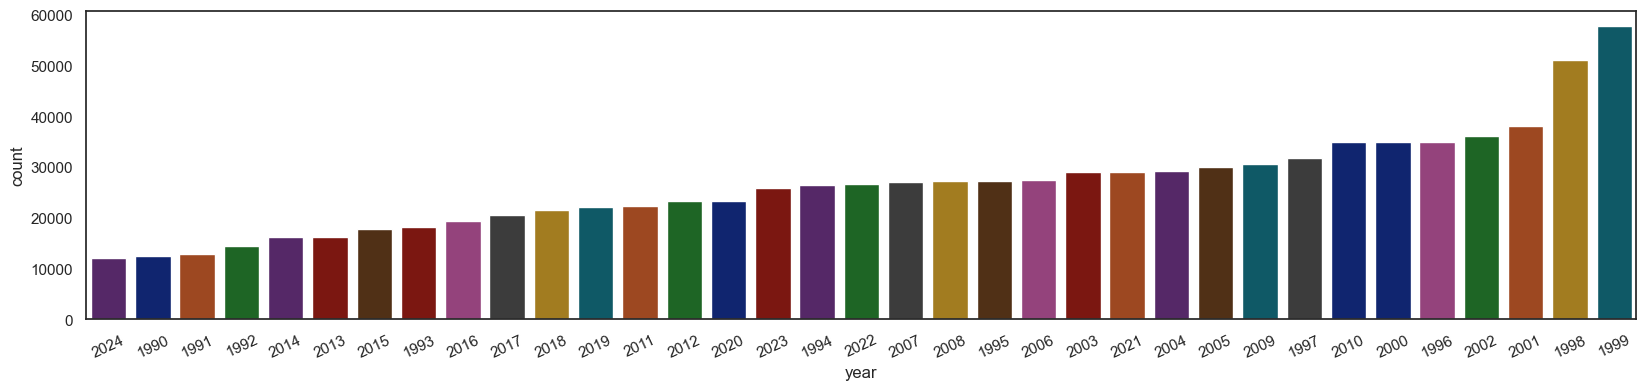

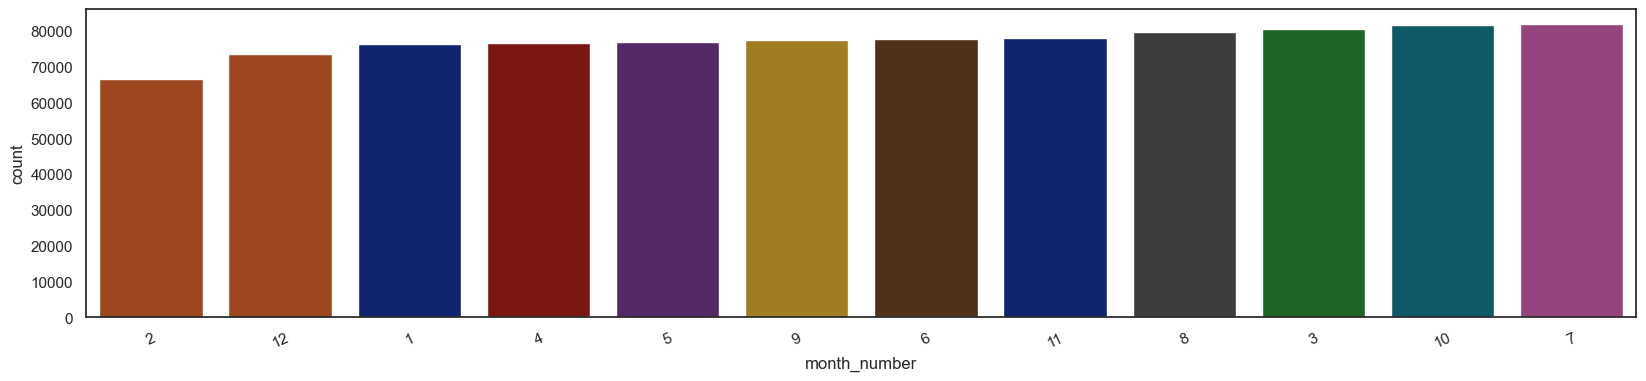

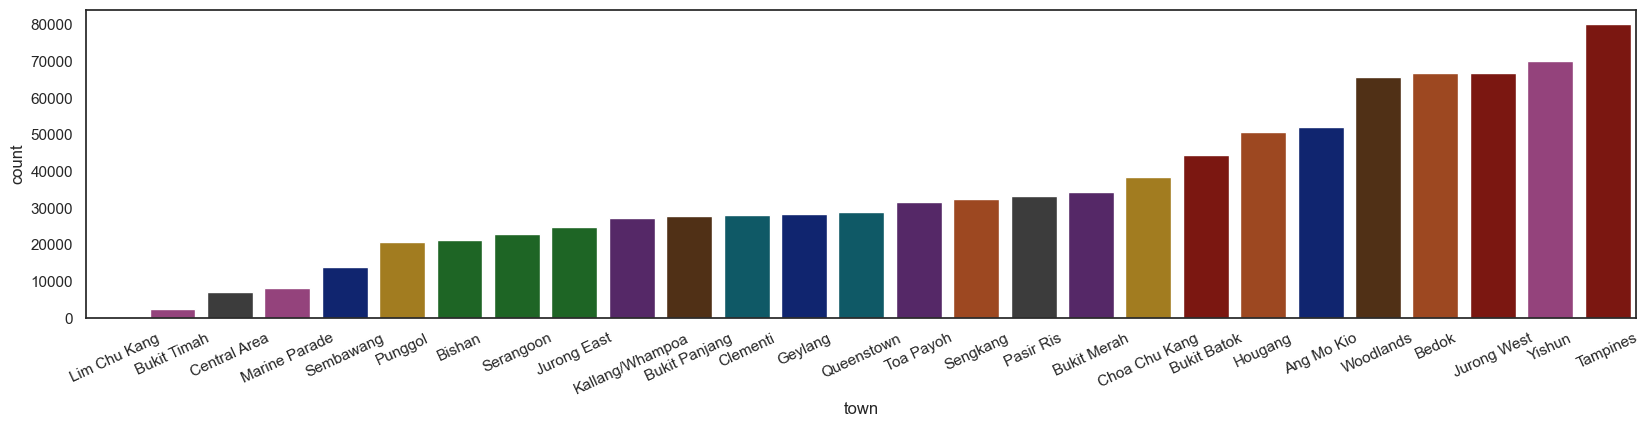

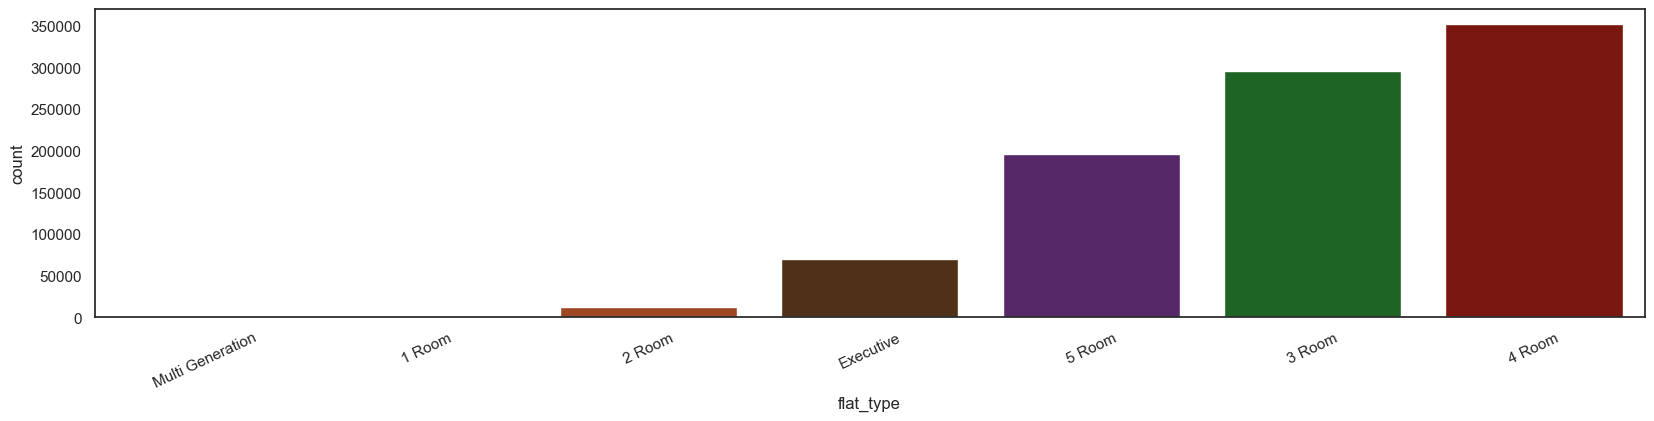

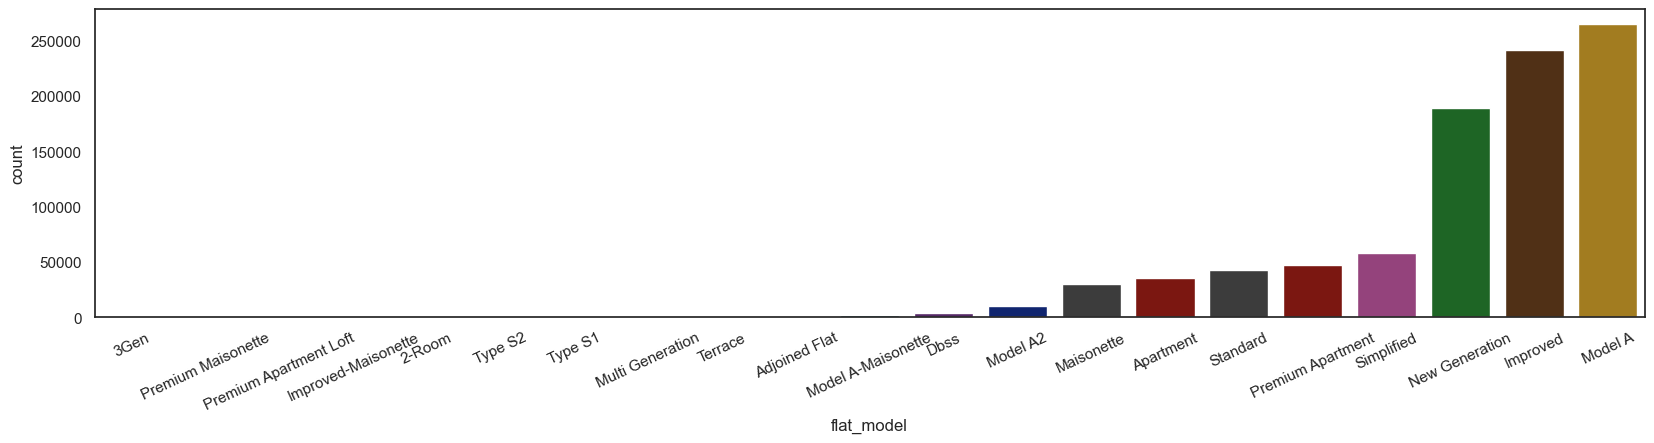

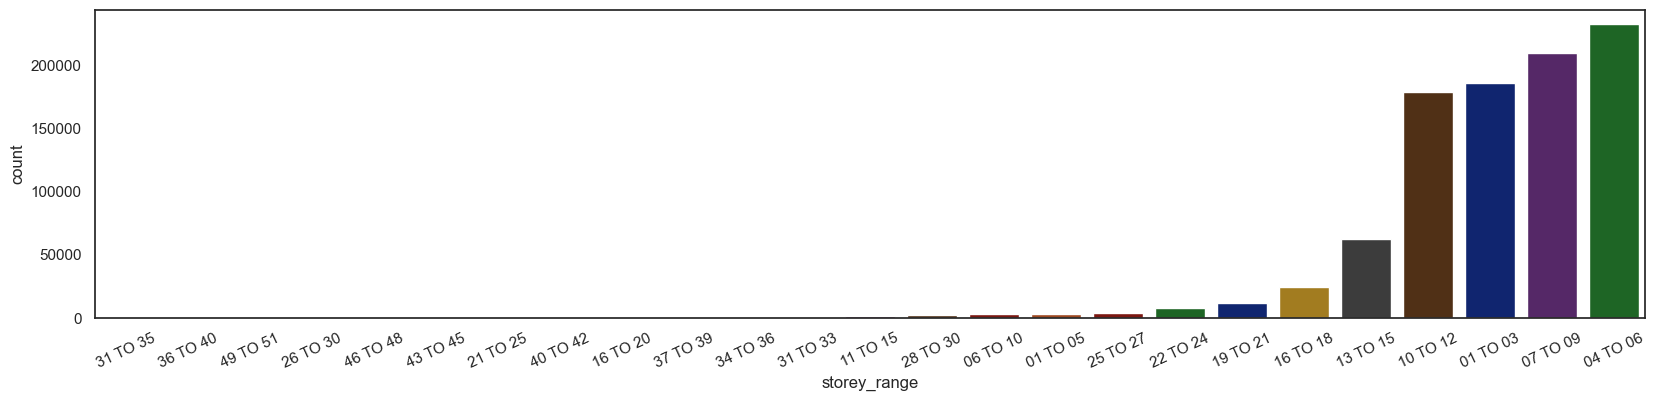

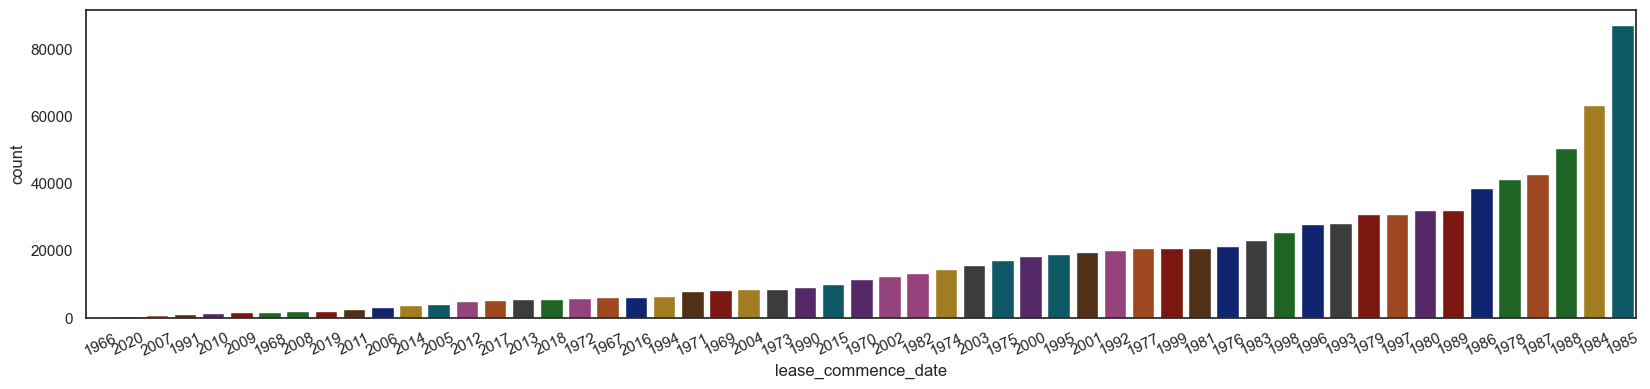

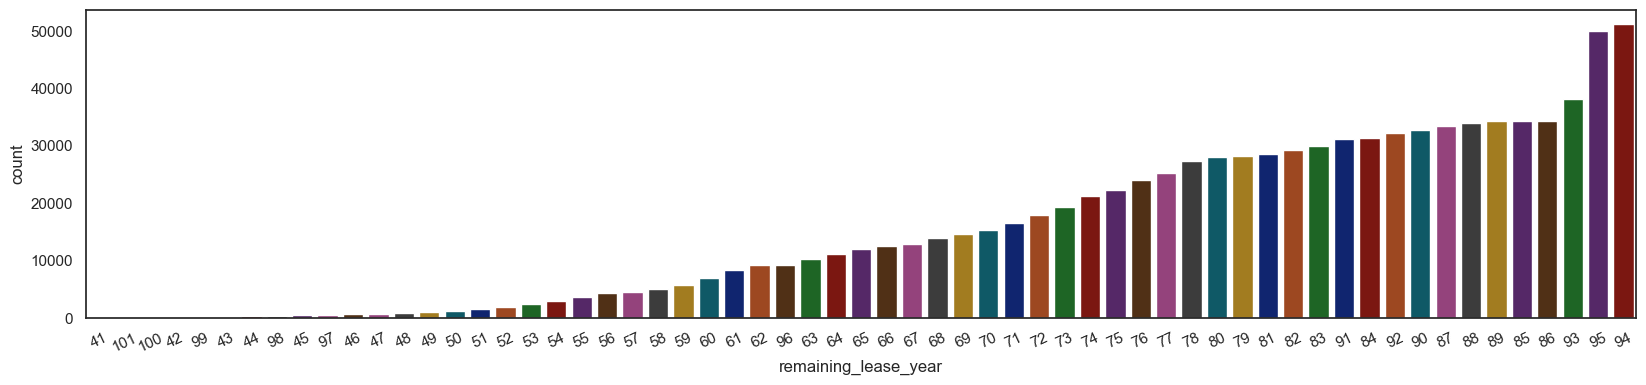

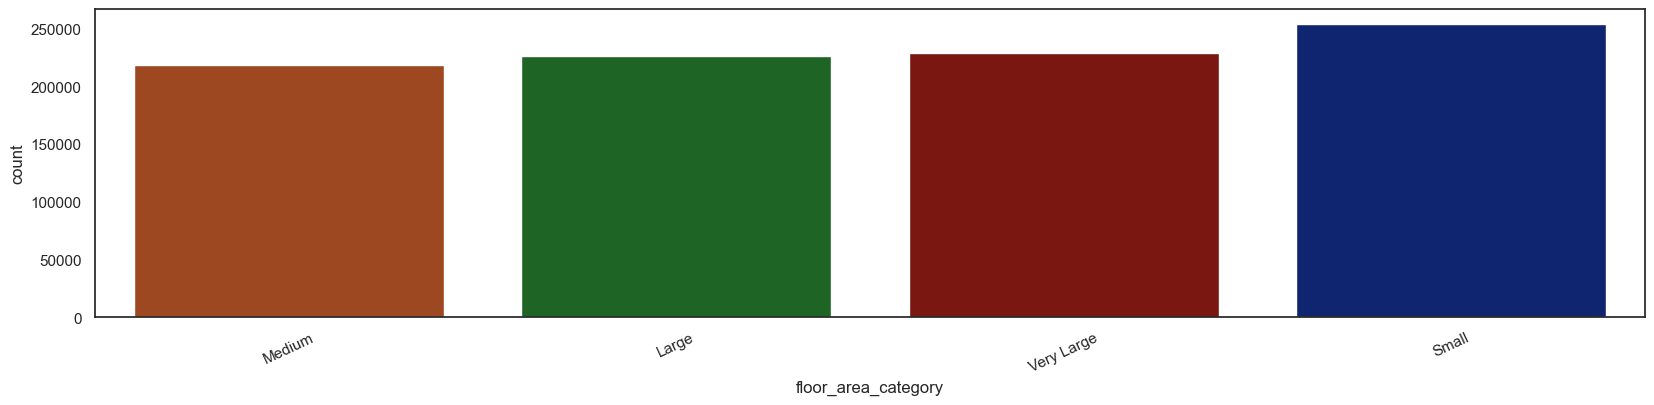

In [46]:
for i in categorical:
    plt.figure(figsize=(20, 4))
    sns.countplot(data=df1, x=df1[i], hue=i, order = df1[i].value_counts().index.tolist()[::-1],palette='dark',legend=False)
    plt.xticks(rotation=25)
    plt.show()

### Outliers based on the Categorical 

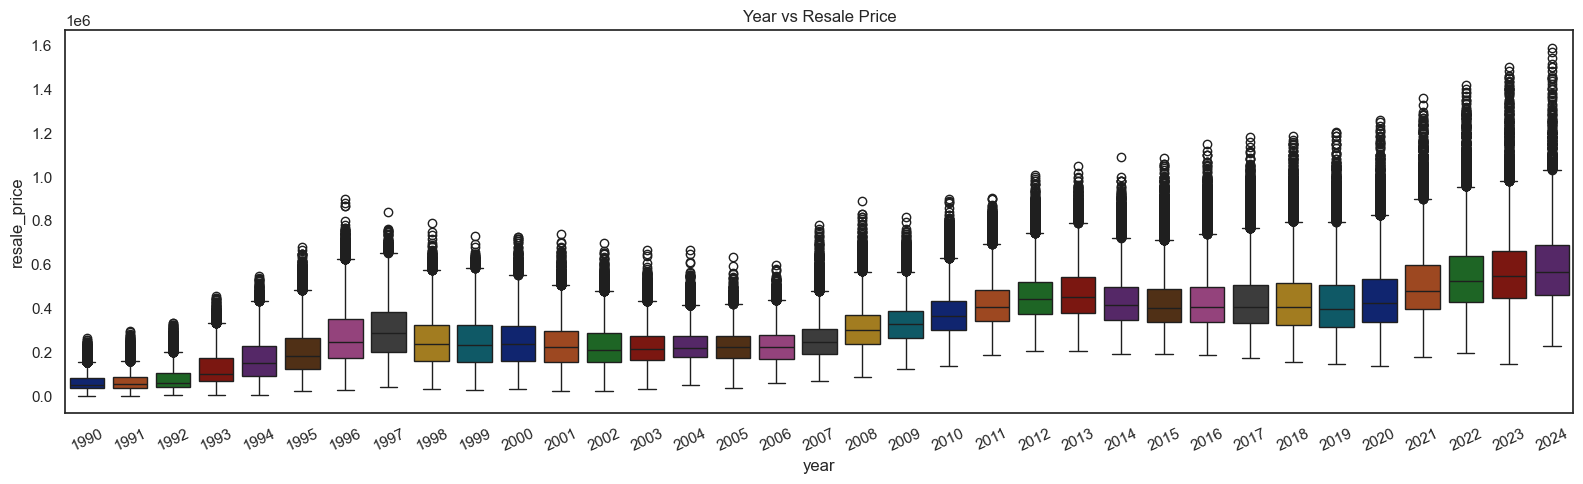

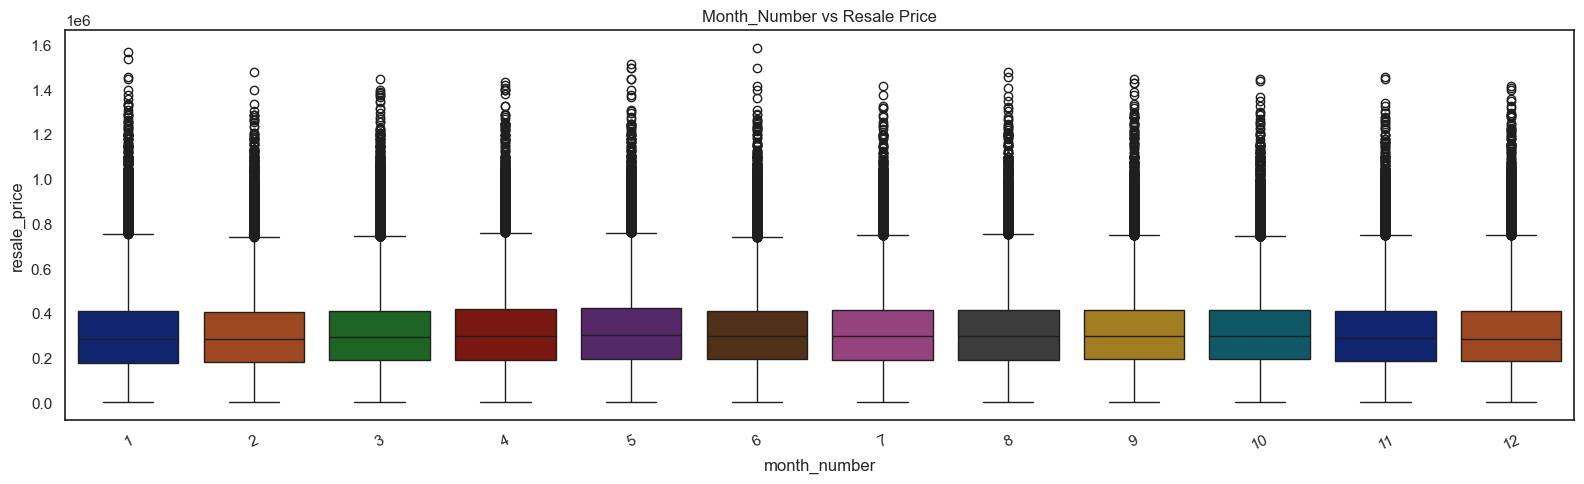

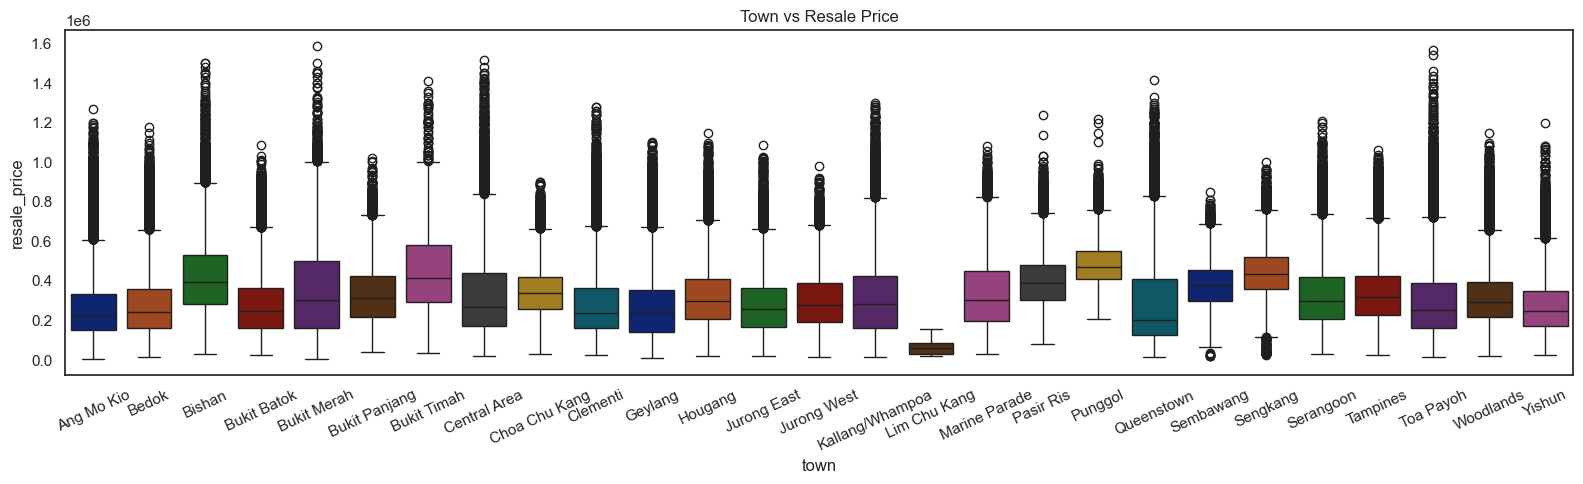

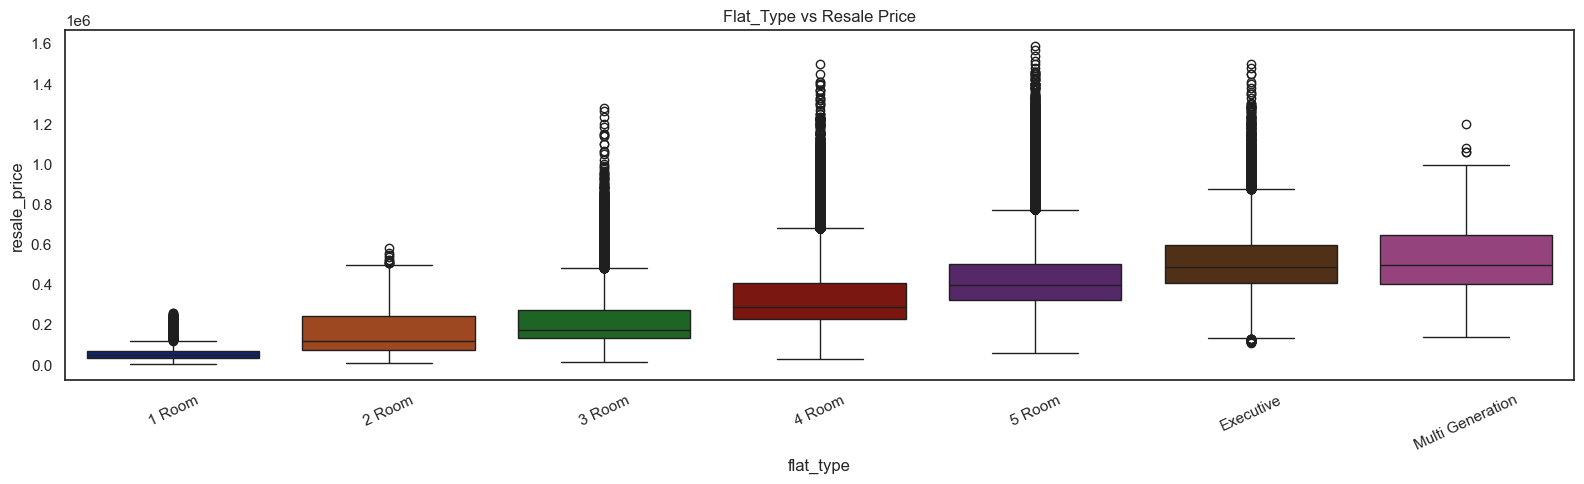

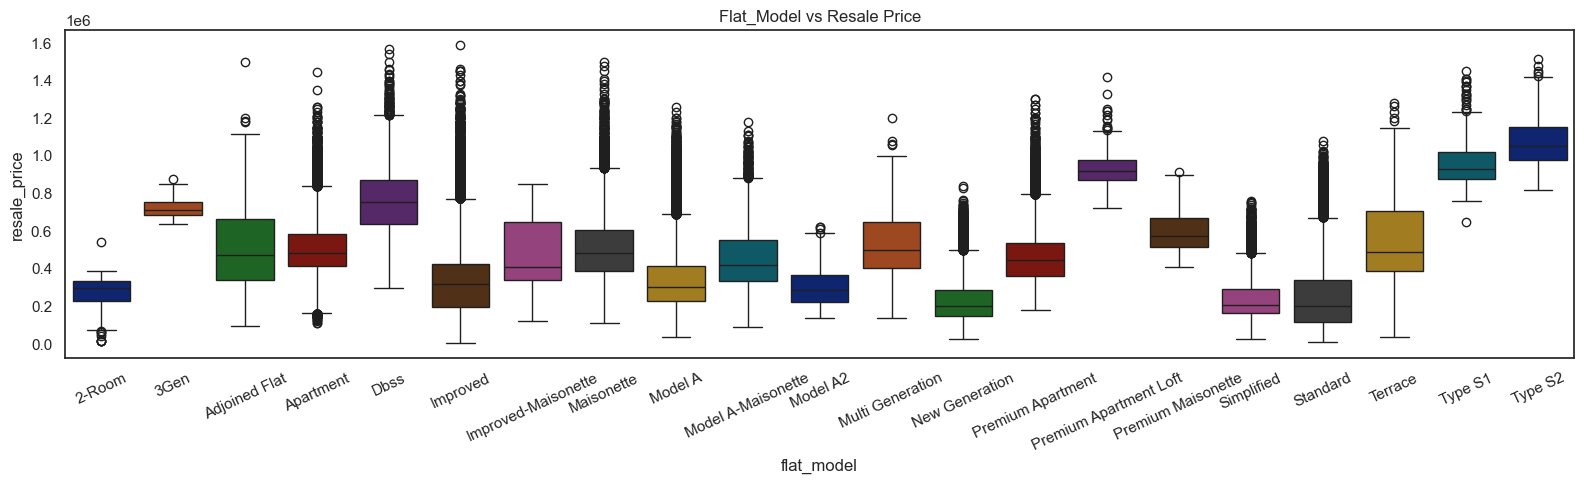

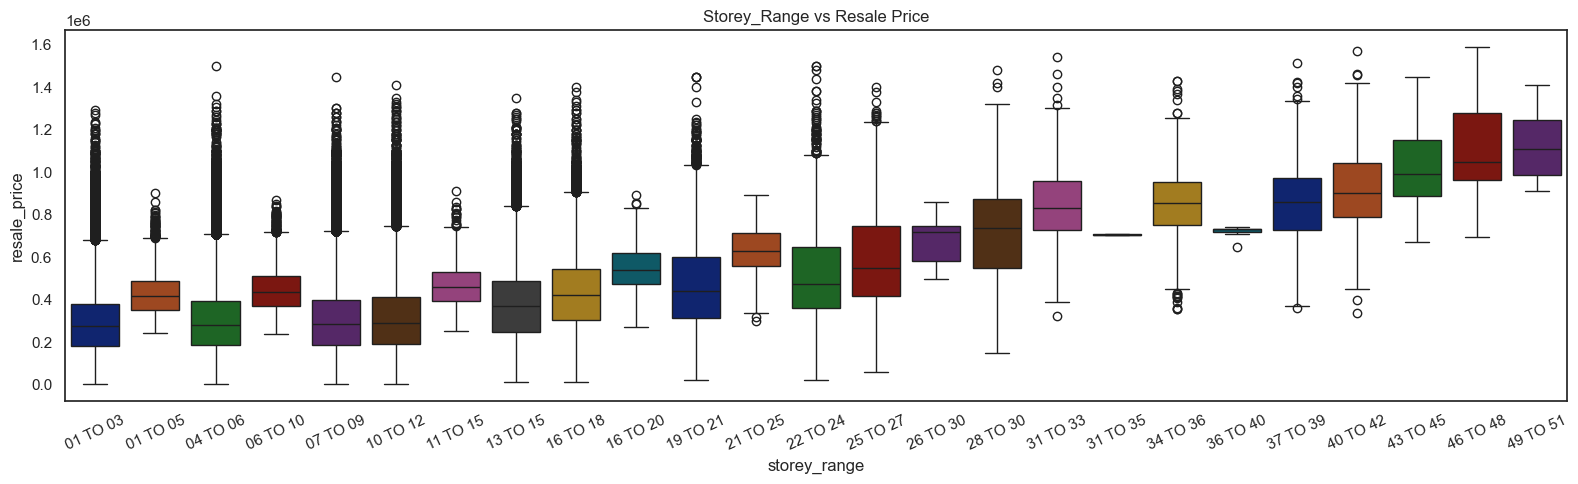

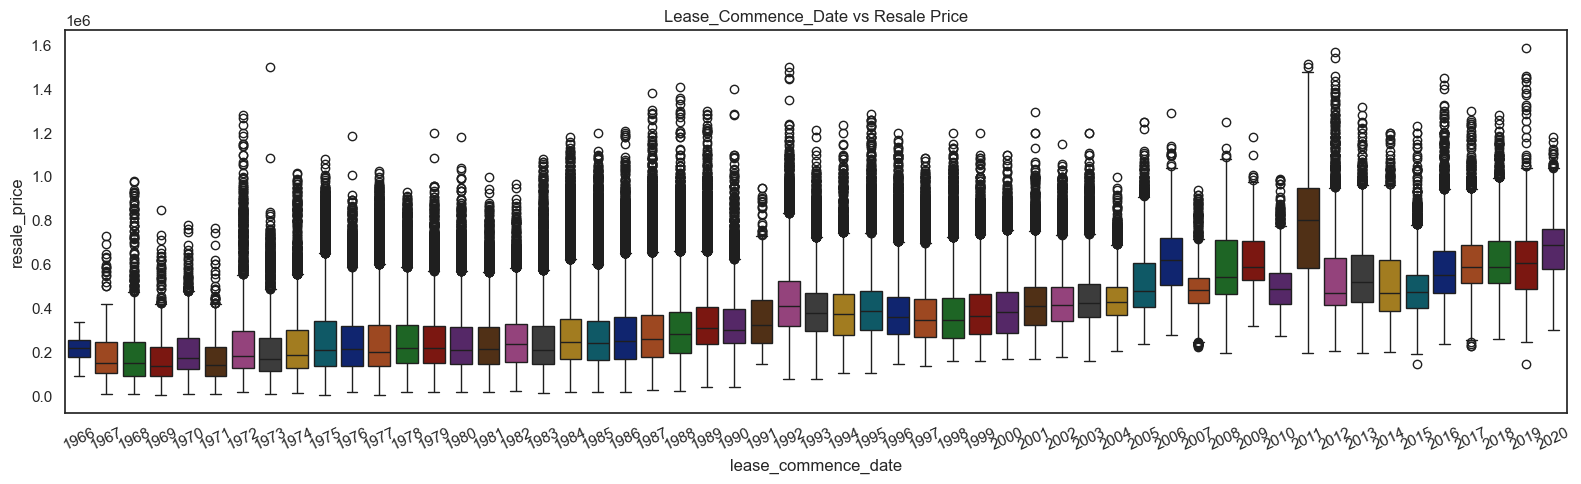

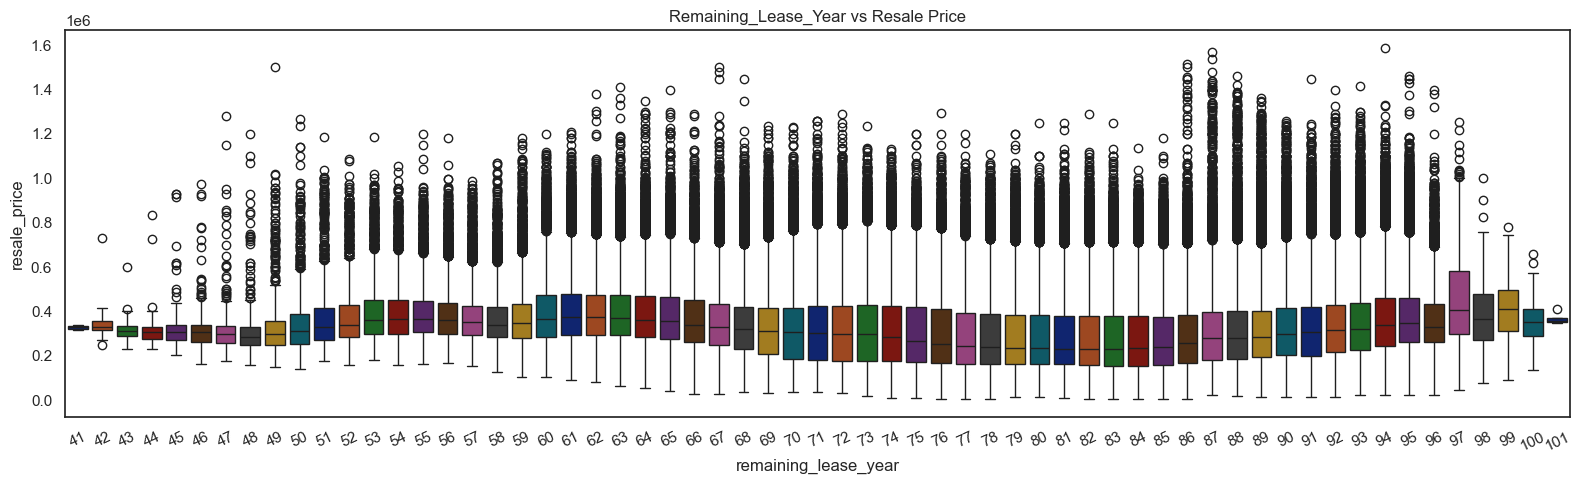

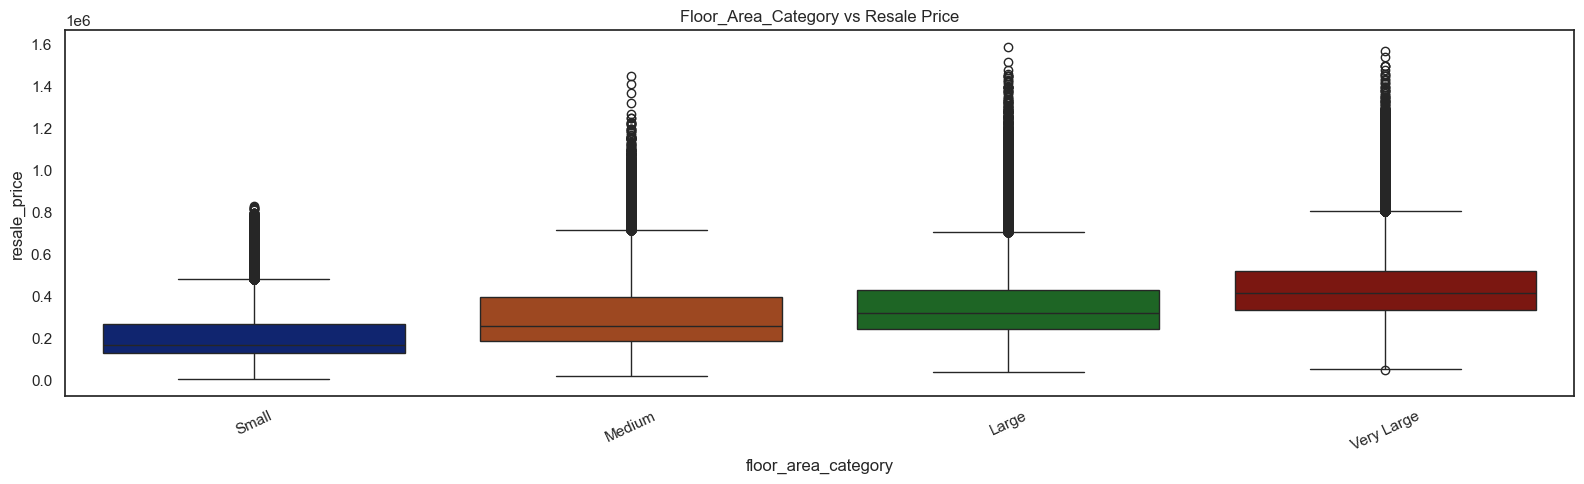

In [62]:
for i in categorical:
    plt.figure(figsize=(16,5))
    sns.boxplot(data=df1,x=i,y="resale_price",hue=i,palette='dark',legend=False)
    plt.xticks(rotation=25)
    plt.title(f'{i.title()} vs Resale Price')
    plt.tight_layout()
    plt.show()

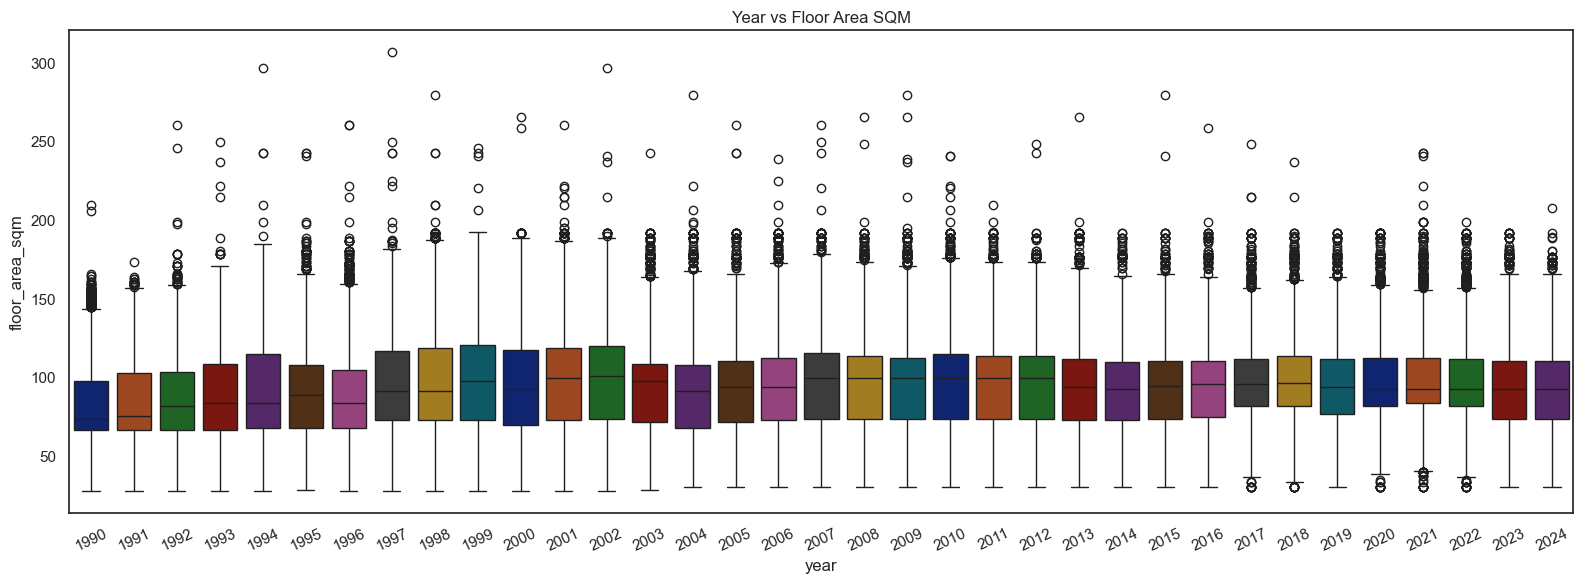

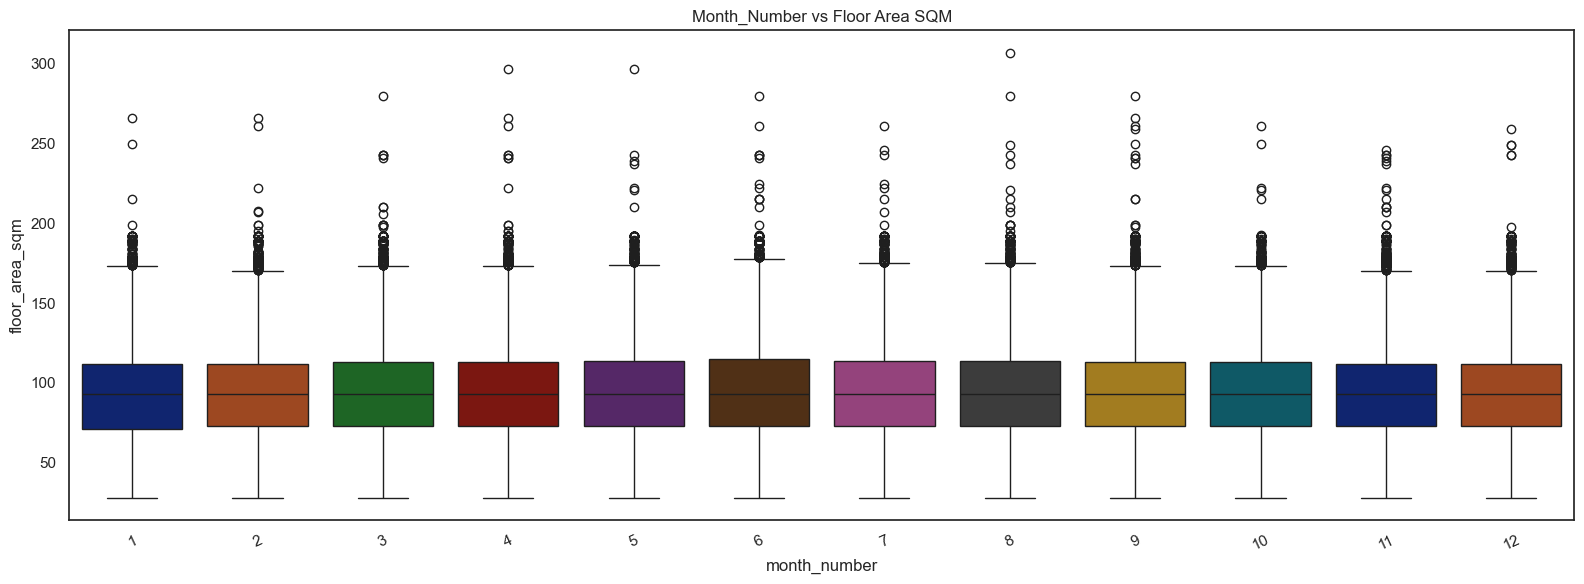

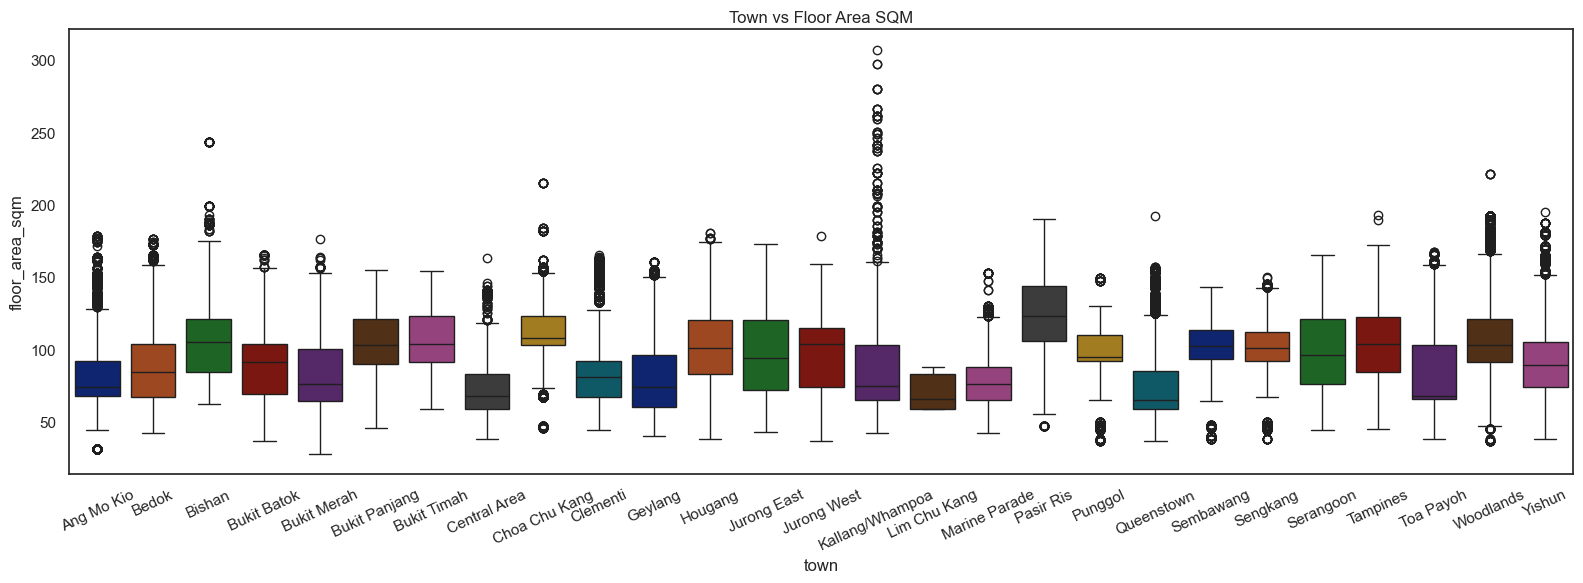

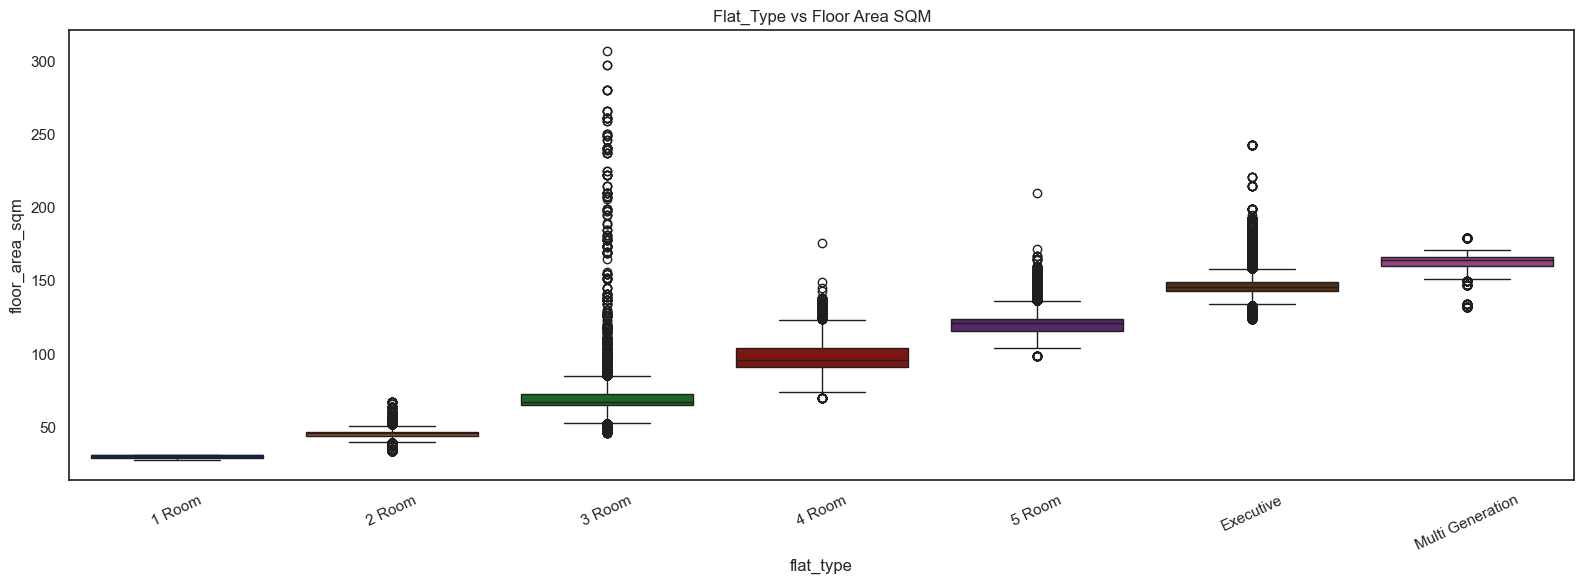

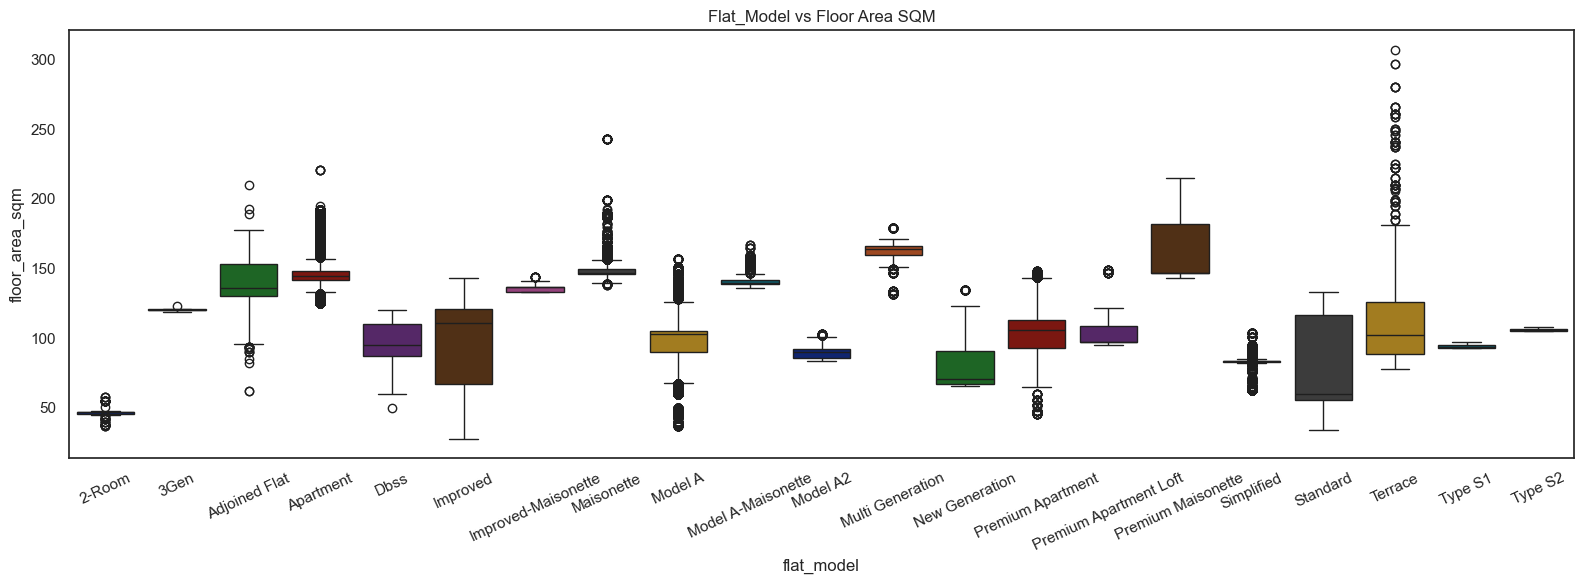

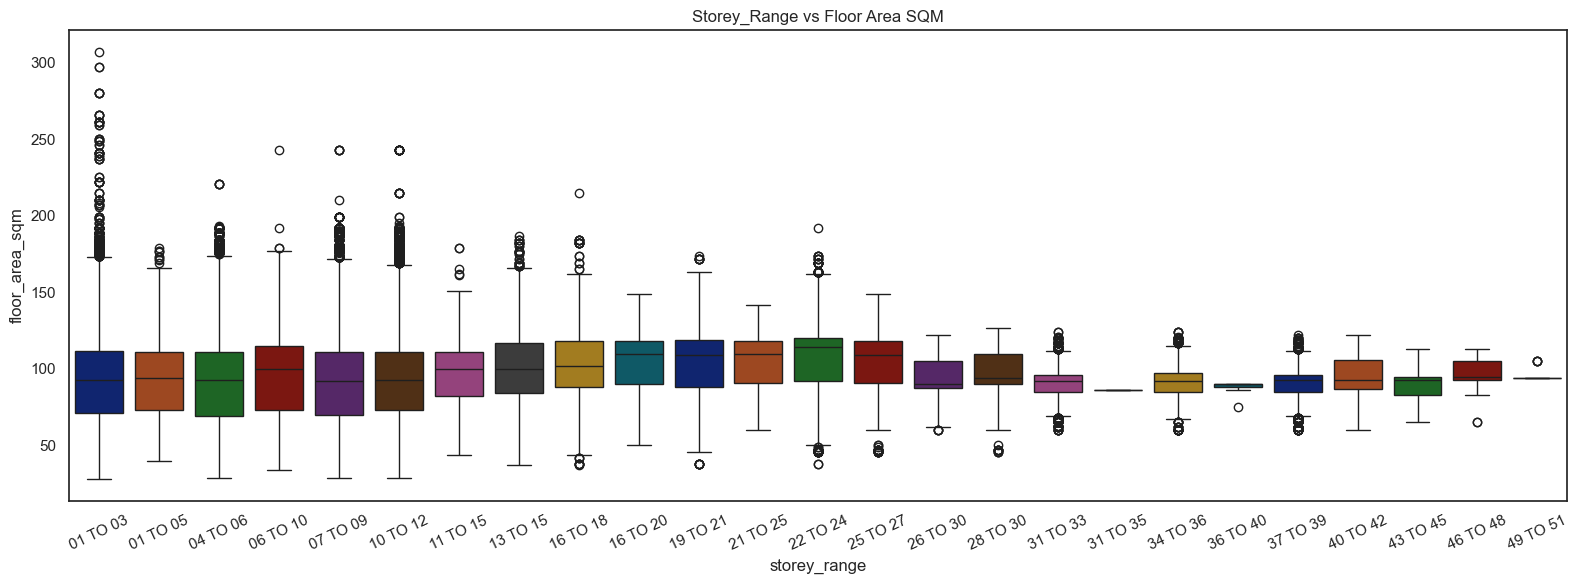

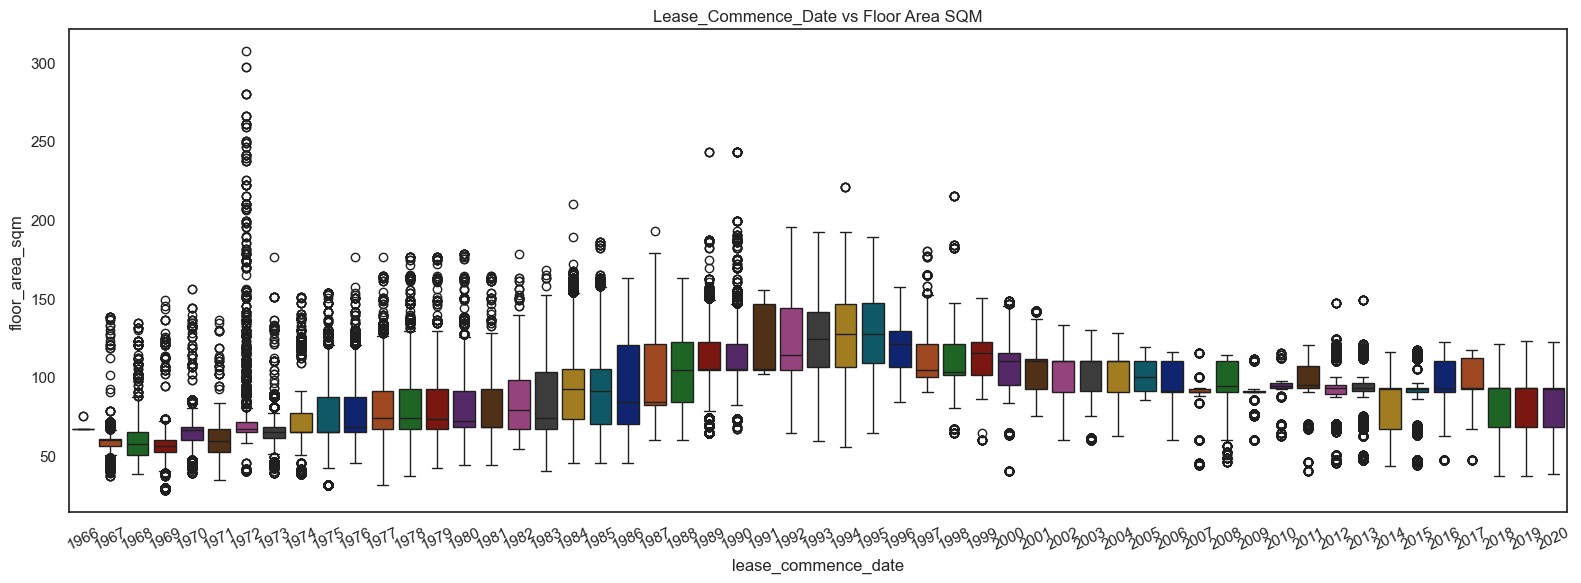

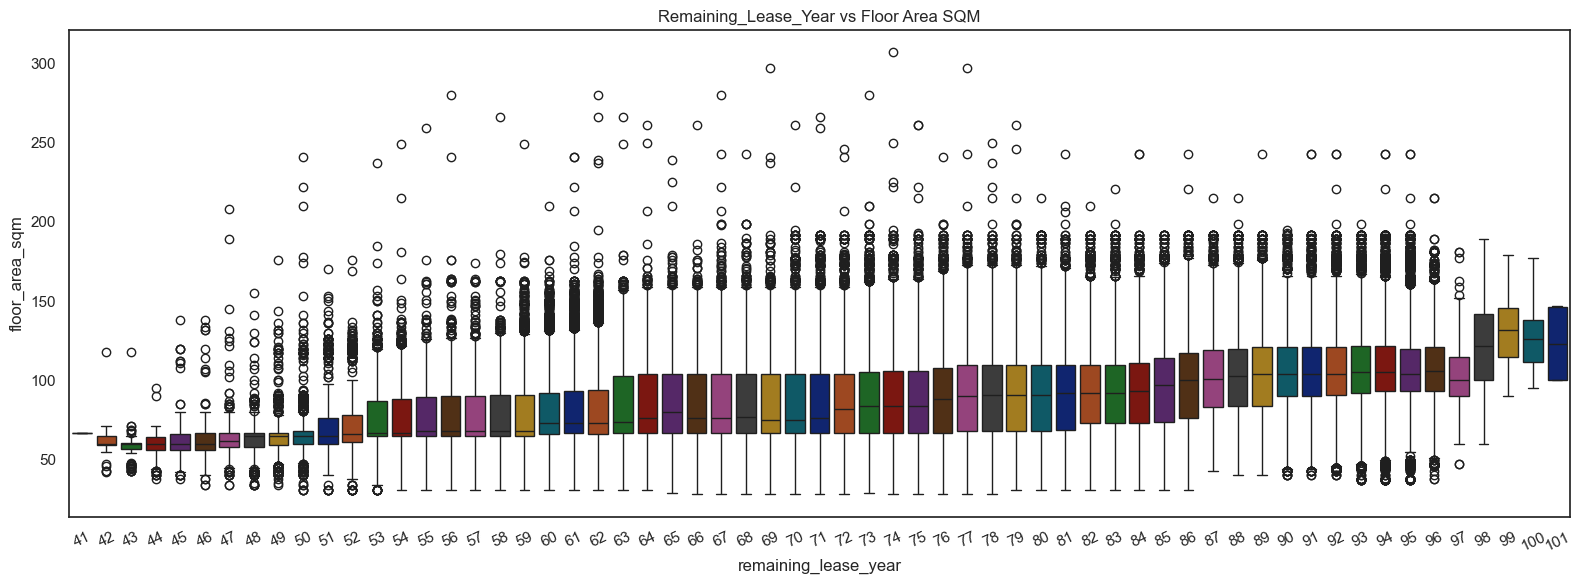

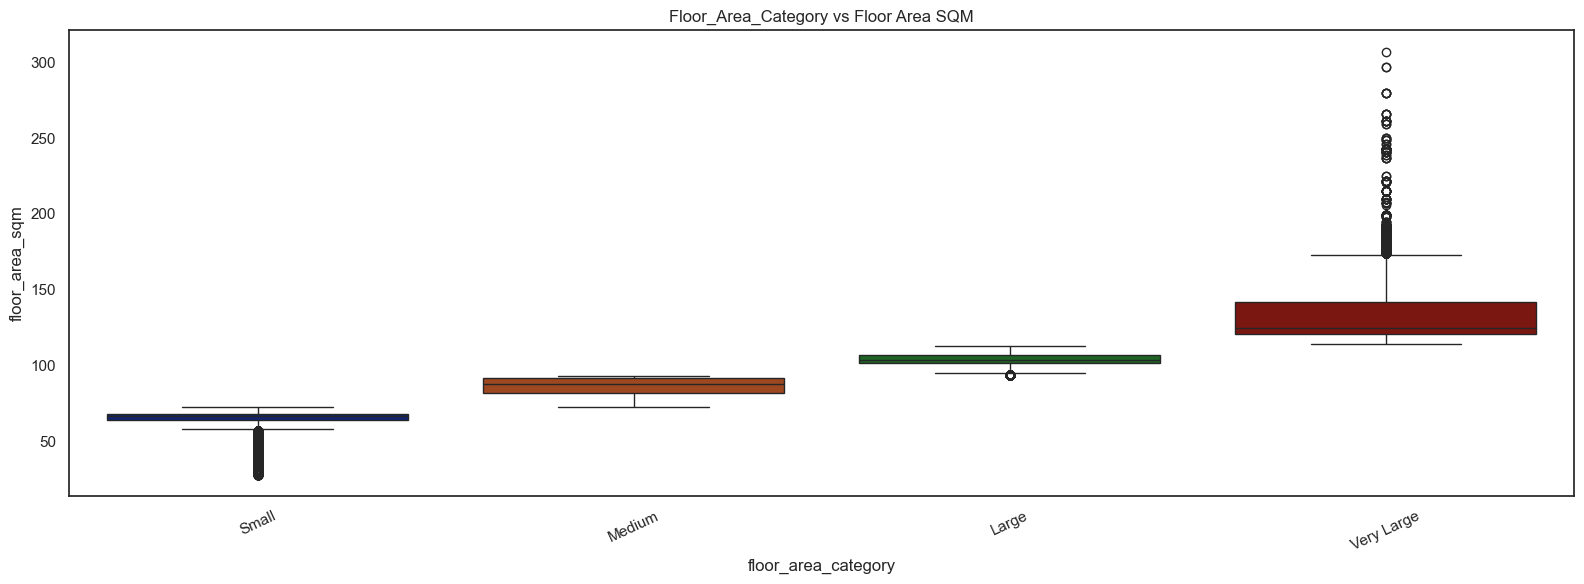

In [63]:
for i in categorical:
    plt.figure(figsize=(16,6))
    sns.boxplot(data=df1,x=i,y="floor_area_sqm",hue=i,palette='dark',legend=False,)
    plt.xticks(rotation=25)
    plt.title(f'{i.title()} vs Floor Area SQM')
    plt.tight_layout()
    plt.show()


### Word Cloud - Checking the frequency in the categorical data

#### Frequency of Flat Type and Flat Model

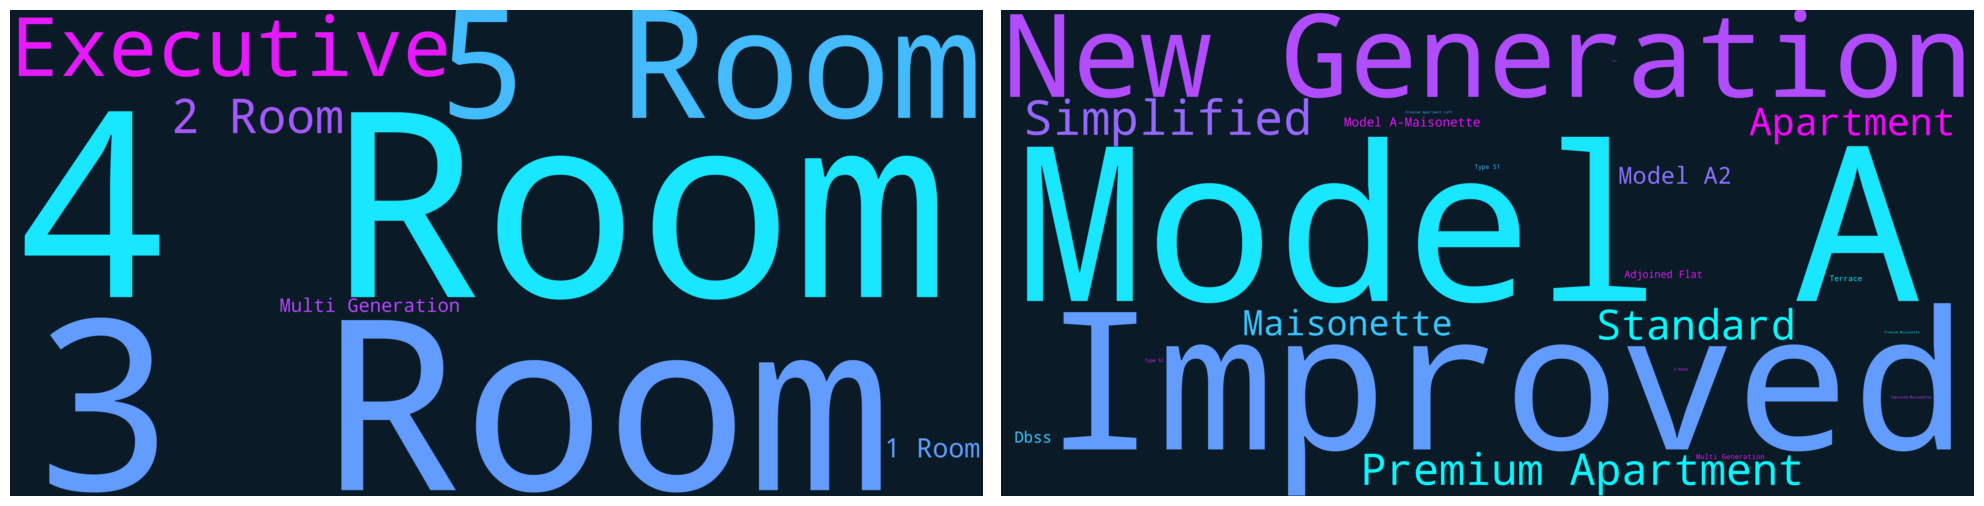

In [72]:
Flat_type = Counter(df1['flat_type'])
Flat_model = Counter(df1['flat_model'])

wordCloud_Flat_type = WordCloud(width= 5000, height = 2500, random_state=1, background_color='#0A1B27',
           colormap='cool', collocations=False, stopwords = STOPWORDS)
wordCloud_Flat_type.generate_from_frequencies(Flat_type)

# Add this line to create wordCloud_Flat_model
wordCloud_Flat_model = WordCloud(width= 5000, height = 2500, random_state=1, background_color='#0A1B27',
           colormap='cool', collocations=False, stopwords = STOPWORDS)
wordCloud_Flat_model.generate_from_frequencies(Flat_model)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(wordCloud_Flat_type, interpolation='bilinear',cmap='Blues')
plt.subplot(1,2,2)
plt.imshow(wordCloud_Flat_model, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

#### Frequency of Town and Storey

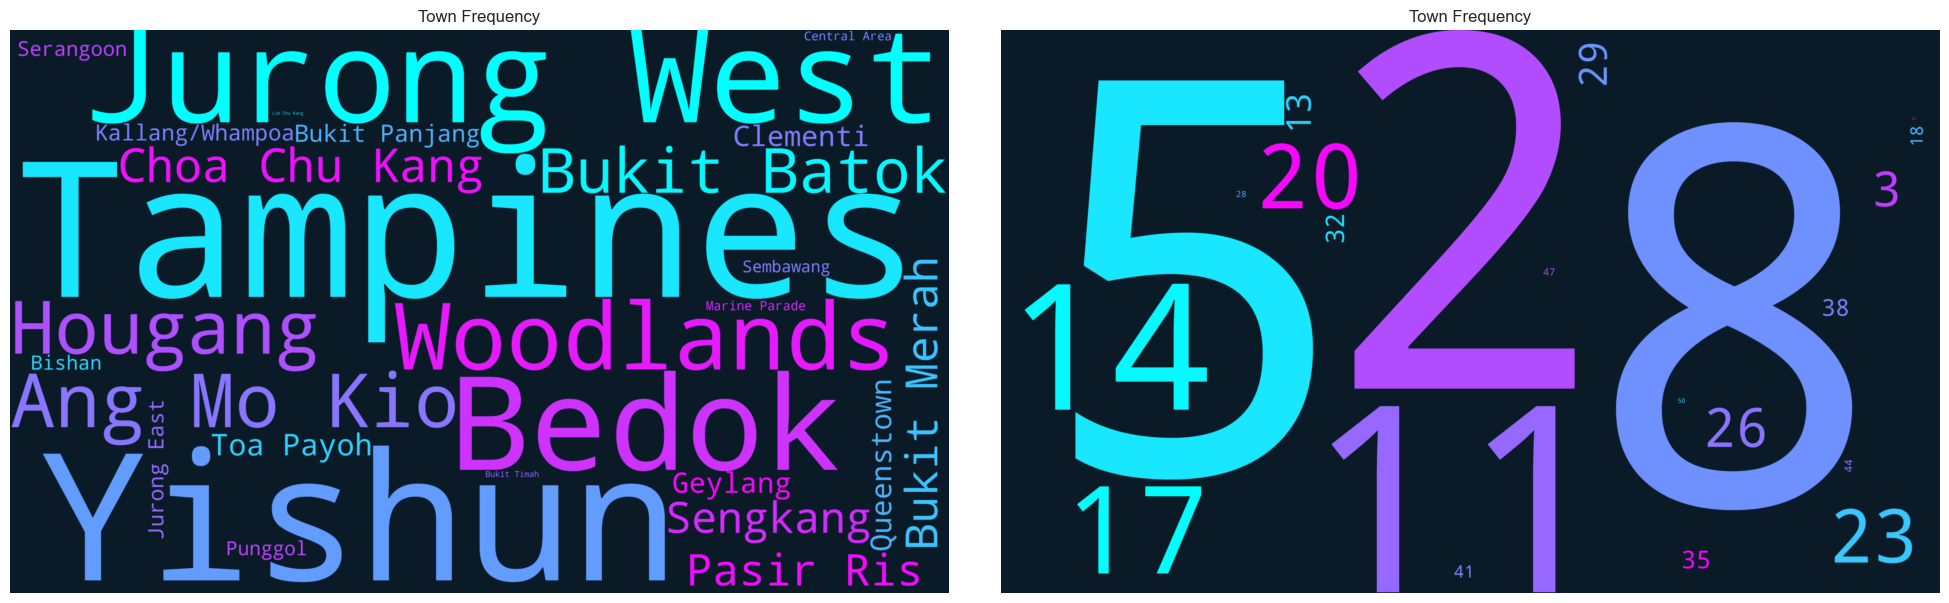

In [73]:
town = Counter(df1['town'])
full_address = Counter(df['Avg_storey_range'].astype('str'))

wordCloud_town = WordCloud(width= 5000, height = 3000, random_state=1, background_color='#0A1B27',
           colormap='cool', collocations=False, stopwords = STOPWORDS)
wordCloud_town.generate_from_frequencies(town)

# Add this line to create wordCloud_Flat_model
wordCloud_full_address = WordCloud(width= 5000, height = 3000, random_state=1, background_color='#0A1B27',
           colormap='cool', collocations=False, stopwords = STOPWORDS)
wordCloud_full_address.generate_from_frequencies(full_address)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(wordCloud_town, interpolation='bilinear',cmap='Blues')
plt.title('Town Frequency')
plt.subplot(1,2,2)
plt.imshow(wordCloud_full_address, interpolation='bilinear')
plt.title('Town Frequency')
plt.axis('off')
plt.tight_layout()
plt.show()

###   Resale Price Analysis 

In [74]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

def analyze_categorical_relationship(df, continuous_var, categorical_var):
    # Perform one-way ANOVA
    model = ols(f'{continuous_var} ~ C({categorical_var})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Calculate eta-squared (effect size)
    ssr = anova_table.loc['C(' + categorical_var + ')', 'sum_sq']
    sst = ssr + anova_table.loc['Residual', 'sum_sq']
    eta_squared = ssr / sst
    
    # Convert eta-squared to percentage
    significance_percentage = eta_squared * 100
    
    # Determine if there's a significant relationship
    p_value = anova_table.loc['C(' + categorical_var + ')', 'PR(>F)']
    alpha = 0.05  # significance level
    is_significant = p_value < alpha
    
    print(f"Relationship between {continuous_var} and {categorical_var}:")
    print(f"ANOVA: F-statistic = {anova_table.loc['C(' + categorical_var + ')', 'F']:.4f}, p-value = {p_value:.4f}")
    print(f"{categorical_var} has {significance_percentage:.2f}% significance with {continuous_var}")
    print(f"There is {'a' if is_significant else 'no'} statistically significant relationship between {categorical_var} and {continuous_var}.")
    print()
    
# Analyze relationships

for cat_var in categorical:
    analyze_categorical_relationship(df, 'resale_price', cat_var)

Relationship between resale_price and year:
ANOVA: F-statistic = 30875.3446, p-value = 0.0000
year has 53.09% significance with resale_price
There is a statistically significant relationship between year and resale_price.

Relationship between resale_price and month_number:
ANOVA: F-statistic = 49.4007, p-value = 0.0000
month_number has 0.06% significance with resale_price
There is a statistically significant relationship between month_number and resale_price.

Relationship between resale_price and town:
ANOVA: F-statistic = 3585.7858, p-value = 0.0000
town has 9.13% significance with resale_price
There is a statistically significant relationship between town and resale_price.

Relationship between resale_price and flat_type:
ANOVA: F-statistic = 83626.7422, p-value = 0.0000
flat_type has 35.11% significance with resale_price
There is a statistically significant relationship between flat_type and resale_price.

Relationship between resale_price and flat_model:
ANOVA: F-statistic = 1607

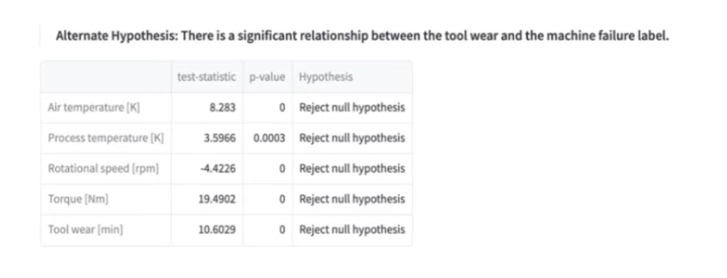

In [ ]:
plt.figure(figsize=(20, 5))
sns.stripplot(data=df1, x="year", y="resale_price", hue="flat_type",palette='dark',s=3)
plt.xticks(rotation=25)
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
sns.stripplot(data=df1, x="flat_type", y="resale_price", hue="flat_type",palette='dark',s=3, legend=True)
plt.xticks(rotation=25)
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
sns.stripplot(data=df1, x="Avg_storey_range", y="resale_price", hue="Avg_storey_range",palette='dark',s=3, legend=False)
plt.xticks(rotation=25)
plt.show()

### Floor Area SQM Analysis 

In [ ]:
sns.set_theme( font_scale=1)  
categorical.remove('floor_area_sqm')
for i in categorical:
    plt.figure(figsize=(25, 5))
    data=df1.groupby(i,observed=False)['floor_area_sqm'].median().reset_index().sort_values('floor_area_sqm')
    sns.barplot(data=data, x=data[i], y=data['floor_area_sqm'],hue=i, order =data[i],legend=False,palette='dark',)
    plt.xticks(rotation=25)
    plt.title(f'Average Floor Area SQM by {i.title()}')
    plt.show()
categorical.append('floor_area_sqm')

### Relationship Between Continuous Features and Target

In [ ]:
import math
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1 ,color_codes=True, rc=None)
total_var=len(continuous)
plot_col=3
plot_row=math.ceil(total_var / 3)

fig, axes = plt.subplots(plot_row, plot_col, figsize=(50, 8))
axes = axes.flatten()
for i, var in  enumerate(continuous):
    sns.scatterplot(data=df1, x=var, y="resale_price", color='maroon',ax=axes[i],s=100)
    axes[i].set_title(f'Scatter plot: {var} vs Resale Price')

for i in range(i + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Relationship Between Categorical Features and Target

In [ ]:
sns.set_theme( font_scale=1)  
for i in categorical:
    plt.figure(figsize=(25, 5))
    data=df1.groupby(i,observed=False)['resale_price'].median().reset_index().sort_values('resale_price')
    sns.barplot(data=data, x=data[i], y=data['resale_price'],hue=i, order =data[i],legend=False,palette='dark',)
    plt.xticks(rotation=25)
    plt.title(f'Average resale_price by {i}')
    plt.show()

### Pair Plot

In [ ]:
plt.figure(figsize=(18,20))
sns.pairplot(data=df1)
plt.show()

### Resale Price by Flat Type and Lease Commence Date

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(data = df1, x ='lease_commence_date', y = 'resale_price',hue='flat_type',style="flat_type",palette=['yellow','aqua','purple','black','orange','darkgreen','maroon'])
plt.title("Resale Price Lease Commence Date and Flat Type")

plt.subplot(1,2,2)
sns.lineplot(data = df1, x ='lease_commence_date', y = 'resale_price',color='maroon')
plt.title("Resale Price by Lease Commence Date")

plt.show()

### Resale Price by Year and Flat Type

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(data = df1, x ='year', y = 'resale_price',hue='flat_type',style="flat_type",palette=['yellow','aqua','purple','black','orange','darkgreen','maroon'])
plt.title("Resale Price Per Year and Flat Type")

plt.subplot(1,2,2)
sns.lineplot(data = df1, x ='year', y = 'resale_price',color='maroon')
plt.title("Resale Price Per Year")

plt.show()

### Resale Price by Avg_storey_range and Flat Type

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(data = df1, x ='Avg_storey_range', y = 'resale_price',hue='flat_type',style="flat_type",palette='dark')
plt.title("Resale Price by Year and Storey Range")

plt.subplot(1,2,2)
sns.lineplot(data = df1, x ='Avg_storey_range', y = 'resale_price',color='maroon')
plt.title("Resale Price Per Year")

plt.show()

### Resale Price by remaining_lease_year and Flat Type

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(data = df1, x ='remaining_lease_year', y = 'resale_price',hue='flat_type',style="flat_type",palette='dark')
plt.title("Resale Price by Year and Storey Range")

plt.subplot(1,2,2)
sns.lineplot(data = df1, x ='remaining_lease_year', y = 'resale_price',color='maroon')
plt.title("Resale Price Per Year")

plt.show()

### Normality Test

In [ ]:
continuous = ['floor_area_sqm', 'price_per_sqm', 'resale_price',]

for var in continuous:
    stat, p = kstest(df1[var], 'norm', args=(df1[var].mean(), df1[var].std()))
    print(f'K-S Test for {var}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'{var} looks normally distributed.\n')
    else:
        print(f'{var} does not look normally distributed.\n')


In [ ]:
from scipy.stats import skew, kurtosis

for var in continuous:
    skewness = skew(df1[var])
    kurt = kurtosis(df1[var])
    print(f'{var} - Skewness: {skewness}, Kurtosis: {kurt}')
    if abs(skewness) < 0.5 and abs(kurt) < 3:
        print(f'{var} looks normally distributed.\n')
    else:
        print(f'{var} does not look normally distributed.\n')

In [ ]:
cor_col = df1.select_dtypes(include='number')
correlation_matrix_pear = cor_col.corr()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix_pear,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Pearson Correlation Matrix')


cor_col = df1.select_dtypes(include='number')
correlation_matrix = cor_col.corr(method='spearman')
plt.subplot(1,2,2)
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

### Experimenting with a few types of data transformation techniques to see which one suits best.

In [ ]:
skew_dict=dict(df1[continuous].skew())
skew_dict

In [ ]:
def boxcox_transform(x):
    # Perform Box-Cox transformation
    transformed_data,lmbda = boxcox(x)
    return transformed_data,lmbda

In [ ]:
method_functions =  {
    'log': np.log,
    'square': np.sqrt,
    'rec': lambda x: 1 / x,
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'pow': lambda x: np.power(x, 2),
    'exp':lambda x: x**(1/5),
    'boxcox': boxcox_transform,
        }

def skewness_checker(df, column, method):
    normalized_df=pd.DataFrame()

    for method_name, func in method_functions.items():
        for col in column:

            new_column = f'{col}_{method_name}'
            if method_name in ['boxcox']:
                transformed_values = func(df[col])[0]
            else:
                transformed_values = func(df[col])
            normalized_df[new_column] = transformed_values

    return normalized_df

In [ ]:
normalized_df=skewness_checker(df1, continuous, method_functions)
normalized_df

In [ ]:
transformed_skewness = {}
transformed_kurtosis = {}
for i in normalized_df.columns:
    univar_num(normalized_df,i)
    skews=normalized_df[i].skew()
    kurt=normalized_df[i].kurtosis()
    transformed_skewness.update({i:skews})
    transformed_kurtosis.update({i:kurt})
    color = color_neutral
    if -0.5 <= skews <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skews <= 0.5 or -0.5 < skews < 0:
        color = color_okay  # Light Green for slightly positive or slightly negative skew
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
      
    print(f"\n\n{color}Skew for {i} is {skews:.2f}{color_neutral}")    
    print(f"\n{color}Kurtosis for {i} is {kurt:.2f}{color_neutral}\n\n")
print( 'Skewness:\n',transformed_skewness,'\n\n','Kurtois:\n',transformed_kurtosis)

## Handling Outliers

### Function to handle outliers based on categorical variables

In [274]:
def handle_outliers_improved(df, continuous_var, categorical_vars, iqr_multiplier=1.5):
    df_copy = df.copy()
    outlier_count = 0
    
    # Group by all categorical variables at once
    grouped = df_copy.groupby(categorical_vars,observed=True)
    
    def replace_outliers(group):
        nonlocal outlier_count
        Q1 = group[continuous_var].quantile(0.25)
        Q3 = group[continuous_var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        
        # Count outliers
        outliers = (group[continuous_var] < lower_bound) | (group[continuous_var] > upper_bound)
        outlier_count += outliers.sum()
        
        # Cap outliers instead of replacing with median
        group.loc[group[continuous_var] < lower_bound, continuous_var] = lower_bound
        group.loc[group[continuous_var] > upper_bound, continuous_var] = upper_bound
        
        return group[continuous_var]

    # Apply the function and update only the continuous variable
    df_copy[continuous_var] = grouped[continuous_var].transform(replace_outliers)
    
    print(f"Total outliers handled: {outlier_count}")
    return df_copy

### List of categorical variables that influence resale_price

In [275]:
categorical_vars = ['year','flat_type','town']

### Apply the function to handle outliers

In [265]:
df1.columns

Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'price_per_sqm', 'year',
       'month_number', 'full_address', 'remaining_lease_year',
       'Avg_storey_range'],
      dtype='object')

In [266]:
df1['full_address'] = df1['full_address'].astype('category')
df1['floor_area_sqm'] = pd.to_numeric(df1['floor_area_sqm'], errors='coerce')
df1['floor_area_sqm'] = df1['floor_area_sqm'].astype('float')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   town                  927465 non-null  category
 1   flat_type             927465 non-null  category
 2   floor_area_sqm        927465 non-null  float64 
 3   flat_model            927465 non-null  category
 4   lease_commence_date   927465 non-null  int32   
 5   resale_price          927465 non-null  float64 
 6   price_per_sqm         927465 non-null  float64 
 7   year                  927465 non-null  int32   
 8   month_number          927465 non-null  int32   
 9   full_address          927465 non-null  category
 10  remaining_lease_year  927465 non-null  int32   
 11  Avg_storey_range      927465 non-null  int8    
dtypes: category(4), float64(3), int32(4), int8(1)
memory usage: 80.3 MB


In [267]:
# df1_cleaned = handle_outliers(df1, 'resale_price', categorical_vars)
df1_cleaned = handle_outliers(df1, 'floor_area_sqm', categorical_vars)
df1_cleaned = handle_outliers(df1, 'price_per_sqm', categorical_vars)

C:\Users\sansu\AppData\Local\Temp\ipykernel_14812\2390348279.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_copy.groupby(categorical_vars)
C:\Users\sansu\AppData\Local\Temp\ipykernel_14812\2390348279.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = grouped.apply(replace_outliers)
C:\Users\sansu\AppData\Local\Temp\ipykernel_14812\2390348279.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

Total outliers handled: 85105
Total outliers handled: 26778


C:\Users\sansu\AppData\Local\Temp\ipykernel_14812\2390348279.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = grouped.apply(replace_outliers)


## Exploratory Data Analysis. After Handling Skewness and Outliers

In [268]:
df1_cleaned.describe().T

count           mean            std          min  \
floor_area_sqm        927465.0      95.691236      25.824985    28.000000   
lease_commence_date   927465.0    1988.278012      10.664813  1966.000000   
resale_price          927465.0  320848.058806  170522.857301  5000.000000   
price_per_sqm         927465.0    3315.967875    1529.042763   162.665362   
year                  927465.0    2006.174394       9.324771  1990.000000   
month_number          927465.0       6.550482       3.413028     1.000000   
remaining_lease_year  927465.0      81.103618      10.717863    41.000000   
Avg_storey_range      927465.0       7.689827       4.821337     2.000000   

                               25%            50%            75%           max  
floor_area_sqm            73.00000      93.000000     113.000000  3.070000e+02  
lease_commence_date     1981.00000    1986.000000    1996.000000  2.020000e+03  
resale_price          193000.00000  297500.000000  418000.000000  1.588000e+06  
price_per_sqm           2292.45283    2954.022989    4198.717949  1.559140e+04  
year                    1999.00000    2005.000000    2014.000000  2.024000e+03  
month_number               4.00000       7.000000      10.000000  1.200000e+01  
remaining_lease_year      74.00000      83.000000      90.000000  1.010000e+02  
Avg_storey_range           5.00000       8.000000      11.000000  5.000000e+01

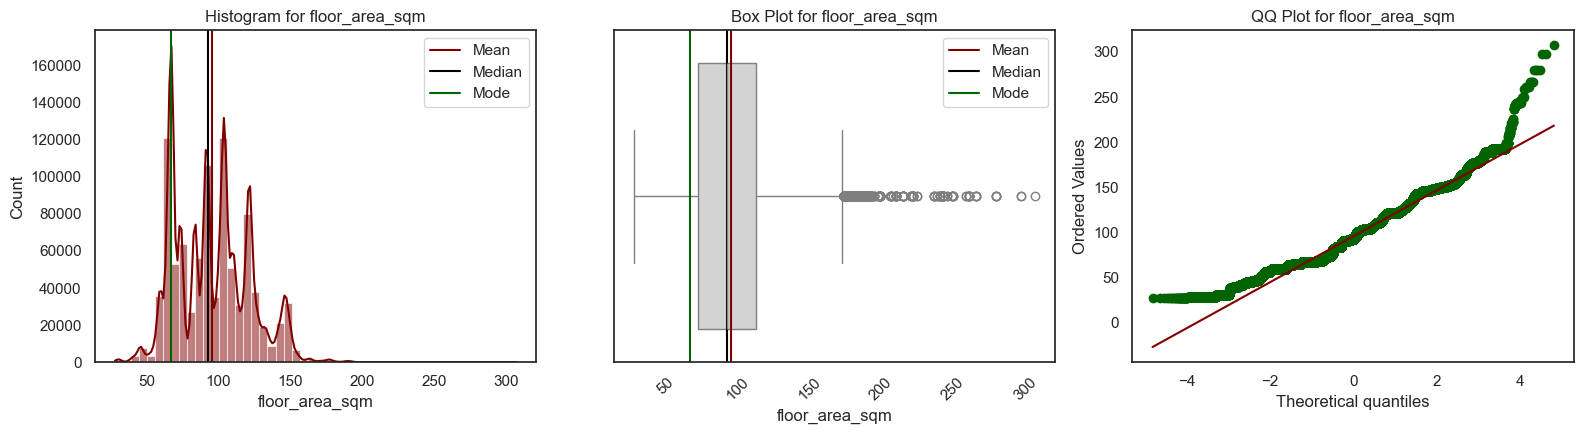


Skew for floor_area_sqm is 0.37



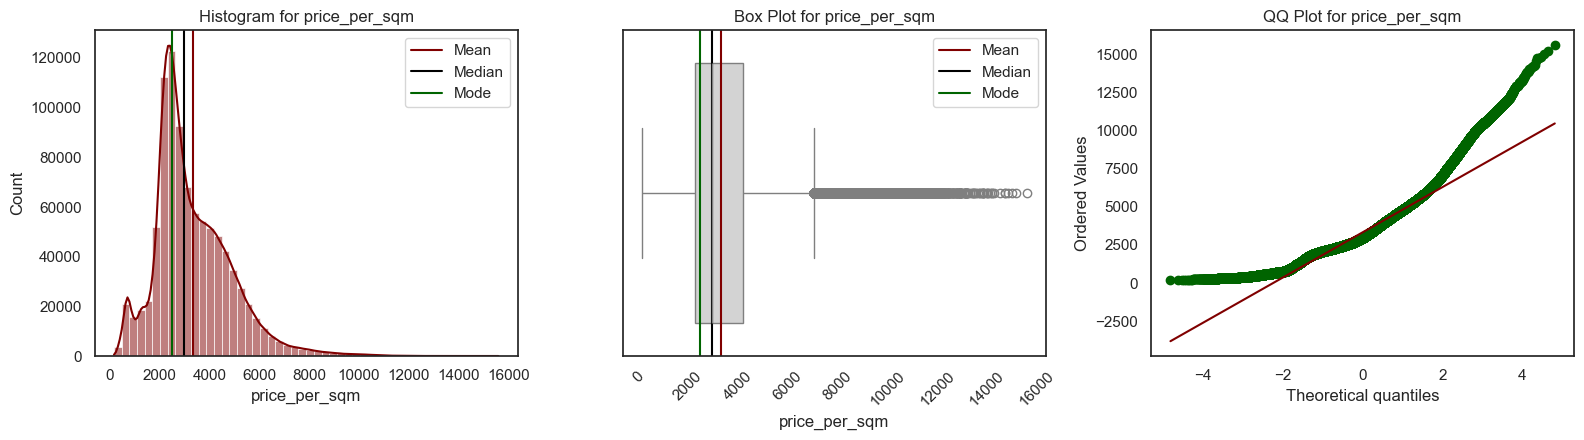


Skew for price_per_sqm is 1.07



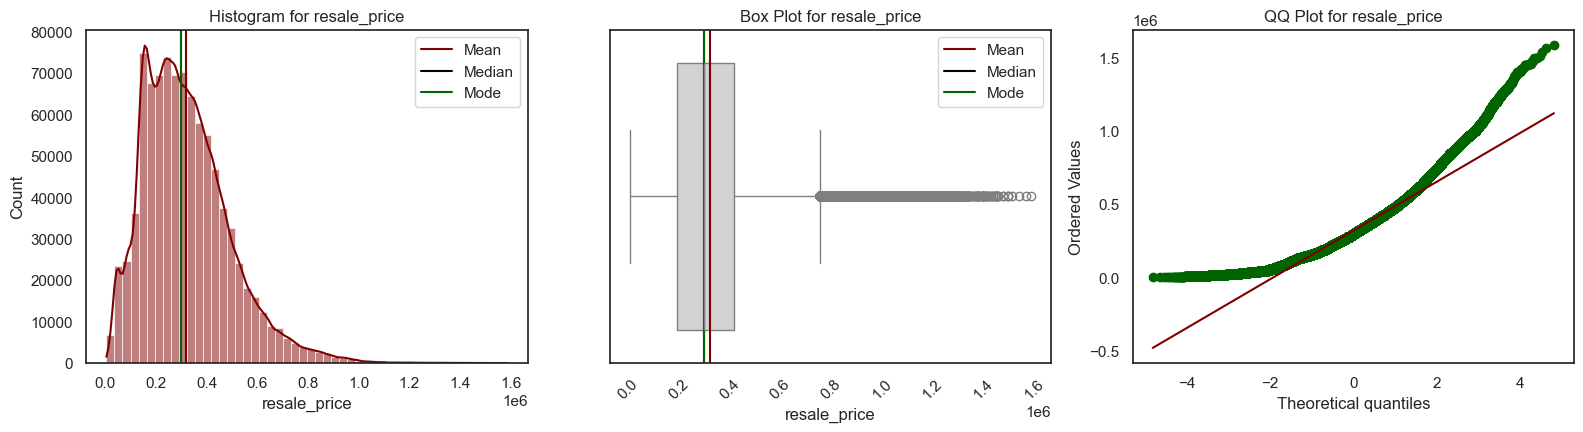


Skew for resale_price is 0.94



In [270]:
color_good = '\033[32m'  # Dark Green for good skew
color_okay = '\033[92m'  # Light Green for okay skew
color_bad = '\033[91m'  # Maroon for bad skew
color_neutral = '\033[0m'  # Reset color

skewed_col = []

sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)  

for i in continuous:
    univar_num(df1_cleaned,i) 
    skew_val = df1_cleaned[i].skew()
    
    if -0.5 <= skew_val <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skew_val <= 0.5 or -0.5 < skew_val < 0:
        color = color_okay  # Light Green for slightly positive or slightly negative skew
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
        skewed_col.append(i)

    print(f"\n{color}Skew for {i} is {skew_val:.2f}{color_neutral}\n")

In [272]:
normalized_df_cleaned=skewness_checker(df1_cleaned, continuous, method_functions)
normalized_df_cleaned

floor_area_sqm_log  price_per_sqm_log  resale_price_log  \
0                 3.433987           5.553210          8.987197   
1                 3.433987           5.196535          8.630522   
2                 3.433987           5.670993          9.104980   
3                 3.433987           5.265528          8.699515   
4                 3.433987           5.265528          8.699515   
...                    ...                ...               ...   
927460            5.099866           8.897966         13.997832   
927461            5.093750           7.184643         12.278393   
927462            5.068904           7.927442         12.996347   
927463            5.093750           7.877790         12.971540   
927464            5.093750           7.998154         13.091904   

        floor_area_sqm_square  price_per_sqm_square  resale_price_square  \
0                    5.567764             16.064387            89.442719   
1                    5.567764             13.440430            74.833148   
2                    5.567764             17.038855            94.868330   
3                    5.567764             13.912167            77.459667   
4                    5.567764             13.912167            77.459667   
...                       ...                   ...                  ...   
927460              12.806248             85.539892          1095.445115   
927461              12.767145             36.318293           463.680925   
927462              12.609520             52.652892           663.927707   
927463              12.767145             51.361822           655.743852   
927464              12.767145             54.547778           696.419414   

        floor_area_sqm_rec  price_per_sqm_rec  resale_price_rec  \
0                 0.032258           0.003875      1.250000e-04   
1                 0.032258           0.005536      1.785714e-04   
2                 0.032258           0.003444      1.111111e-04   
3                 0.032258           0.005167      1.666667e-04   
4                 0.032258           0.005167      1.666667e-04   
...                    ...                ...               ...   
927460            0.006098           0.000137      8.333333e-07   
927461            0.006135           0.000758      4.651163e-06   
927462            0.006289           0.000361      2.268603e-06   
927463            0.006135           0.000379      2.325581e-06   
927464            0.006135           0.000336      2.061856e-06   

        floor_area_sqm_sig  ...  resale_price_sig  floor_area_sqm_pow  \
0                      1.0  ...               1.0               961.0   
1                      1.0  ...               1.0               961.0   
2                      1.0  ...               1.0               961.0   
3                      1.0  ...               1.0               961.0   
4                      1.0  ...               1.0               961.0   
...                    ...  ...               ...                 ...   
927460                 1.0  ...               1.0             26896.0   
927461                 1.0  ...               1.0             26569.0   
927462                 1.0  ...               1.0             25281.0   
927463                 1.0  ...               1.0             26569.0   
927464                 1.0  ...               1.0             26569.0   

        price_per_sqm_pow  resale_price_pow  floor_area_sqm_exp  \
0            6.659729e+04      6.400000e+07            1.987341   
1            3.263267e+04      3.136000e+07            1.987341   
2            8.428720e+04      8.100000e+07            1.987341   
3            3.746098e+04      3.600000e+07            1.987341   
4            3.746098e+04      3.600000e+07            1.987341   
...                   ...               ...                 ...   
927460       5.353956e+07      1.440000e+12            2.773121   
927461       1.739810e+06      4.622500e+10            2.769731   
92746

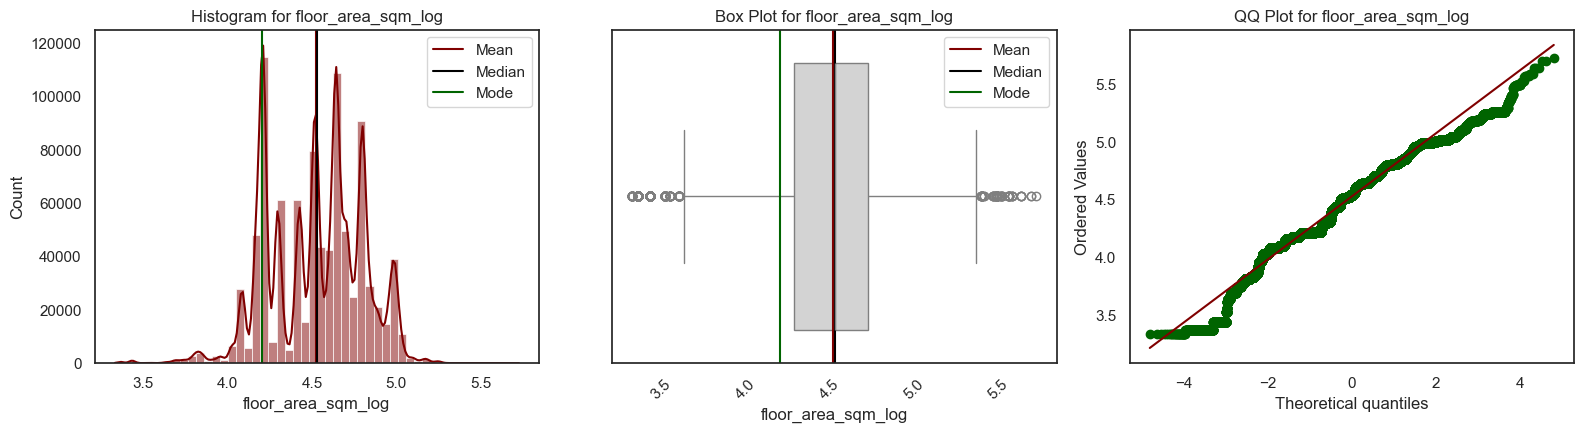



Skew for floor_area_sqm_log is -0.23

Kurtosis for floor_area_sqm_log is -0.36




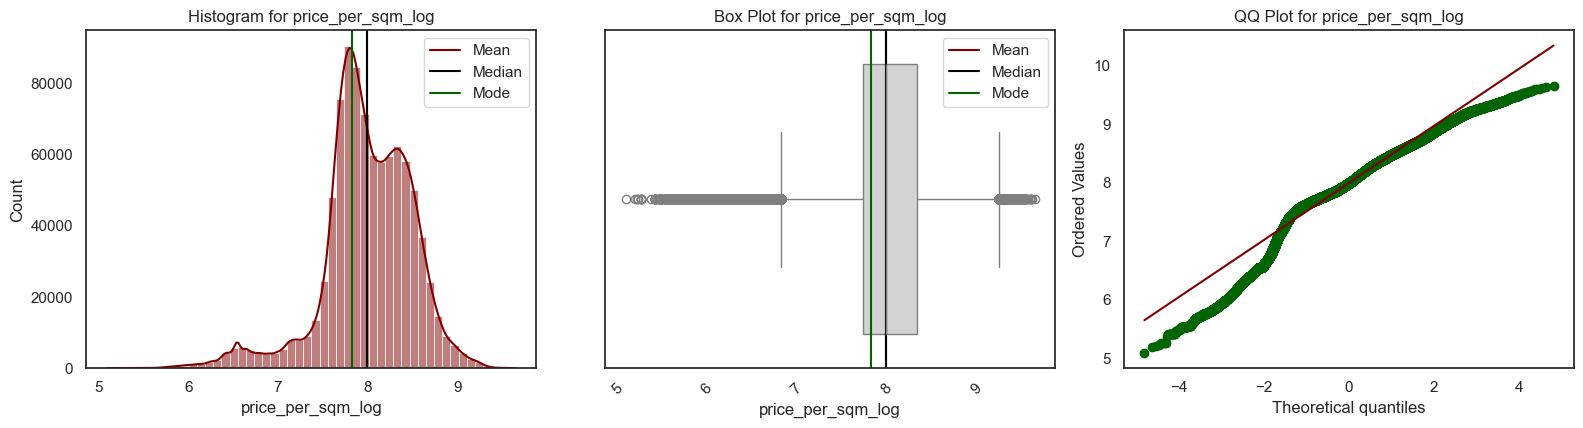



Skew for price_per_sqm_log is -0.82

Kurtosis for price_per_sqm_log is 1.87




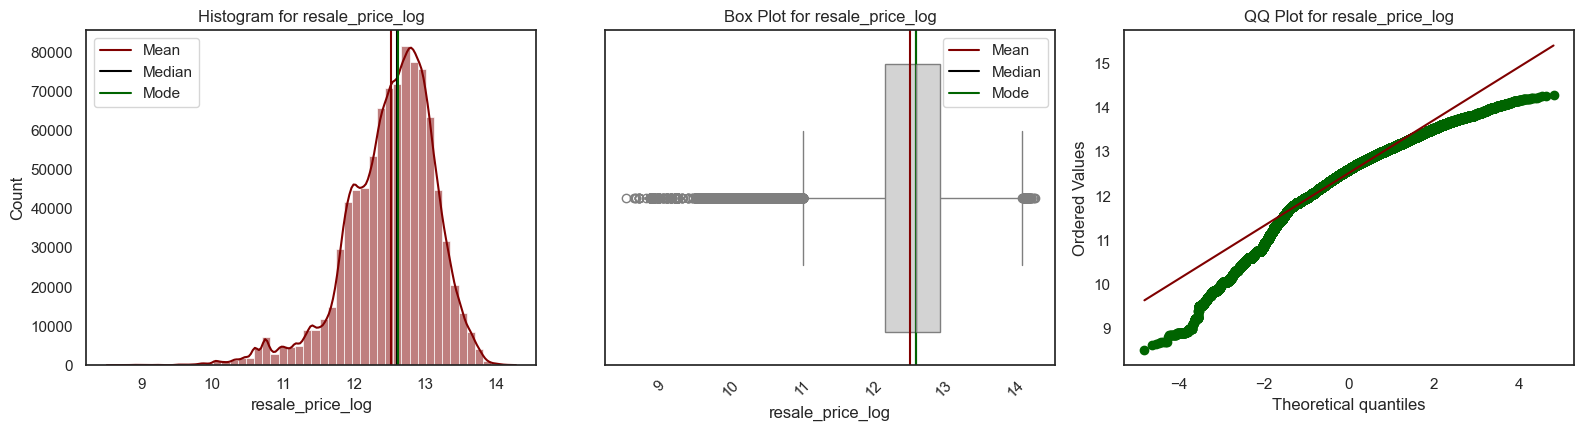



Skew for resale_price_log is -0.92

Kurtosis for resale_price_log is 1.61




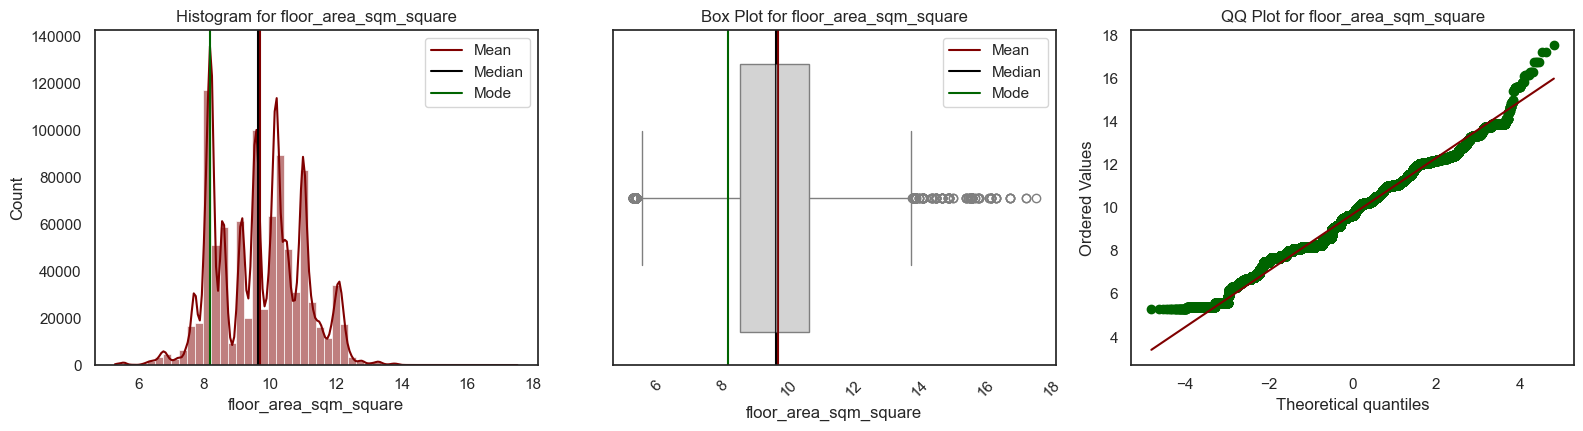



Skew for floor_area_sqm_square is 0.08

Kurtosis for floor_area_sqm_square is -0.57




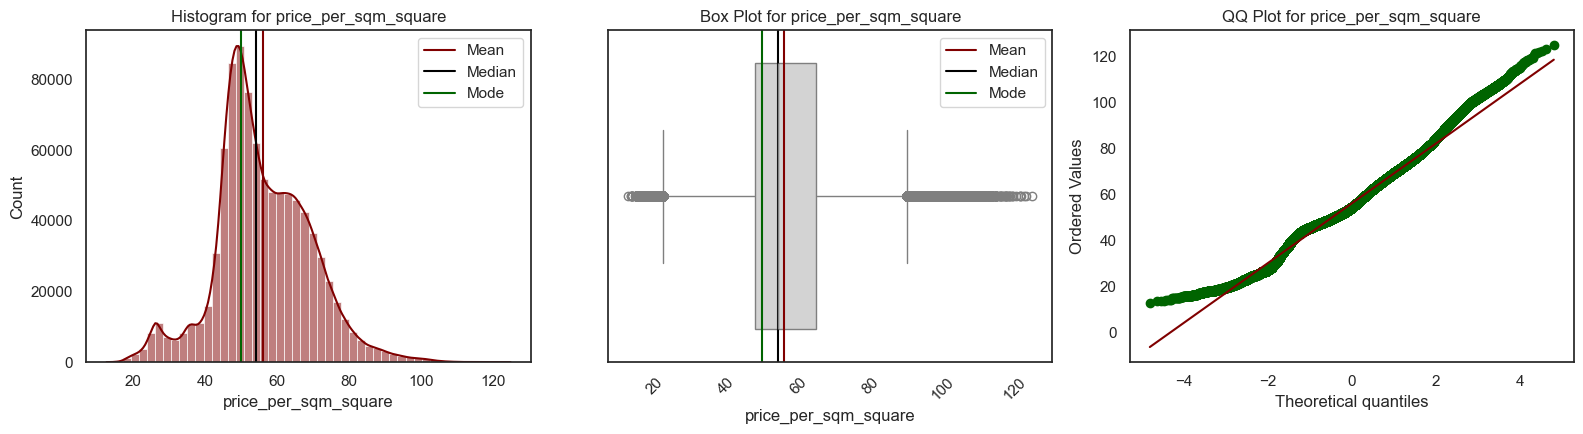



Skew for price_per_sqm_square is 0.22

Kurtosis for price_per_sqm_square is 0.57




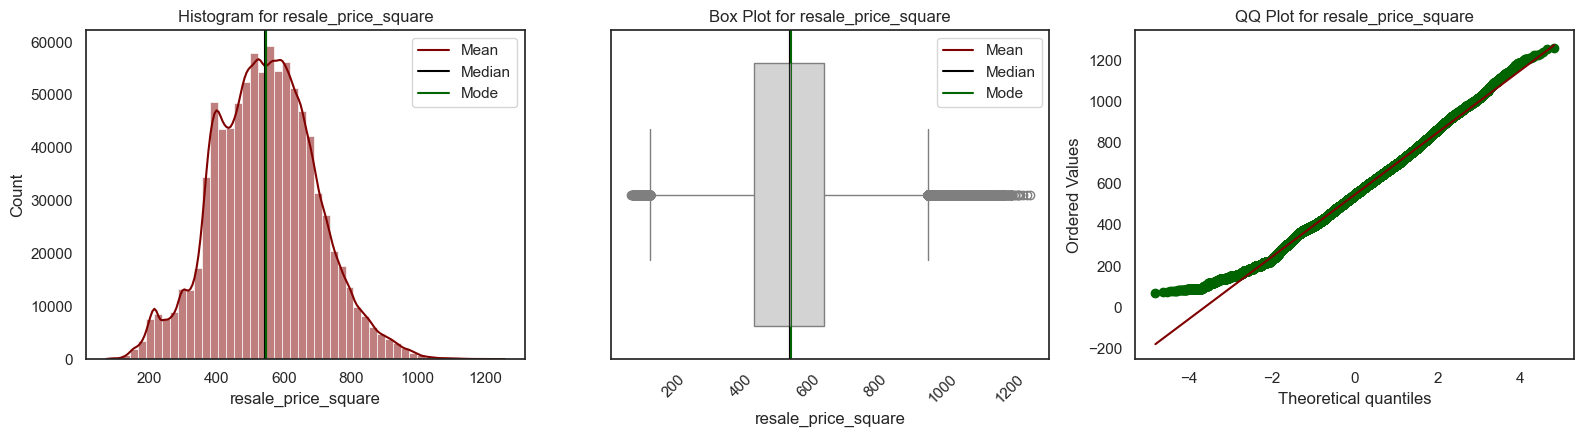



Skew for resale_price_square is 0.11

Kurtosis for resale_price_square is 0.05




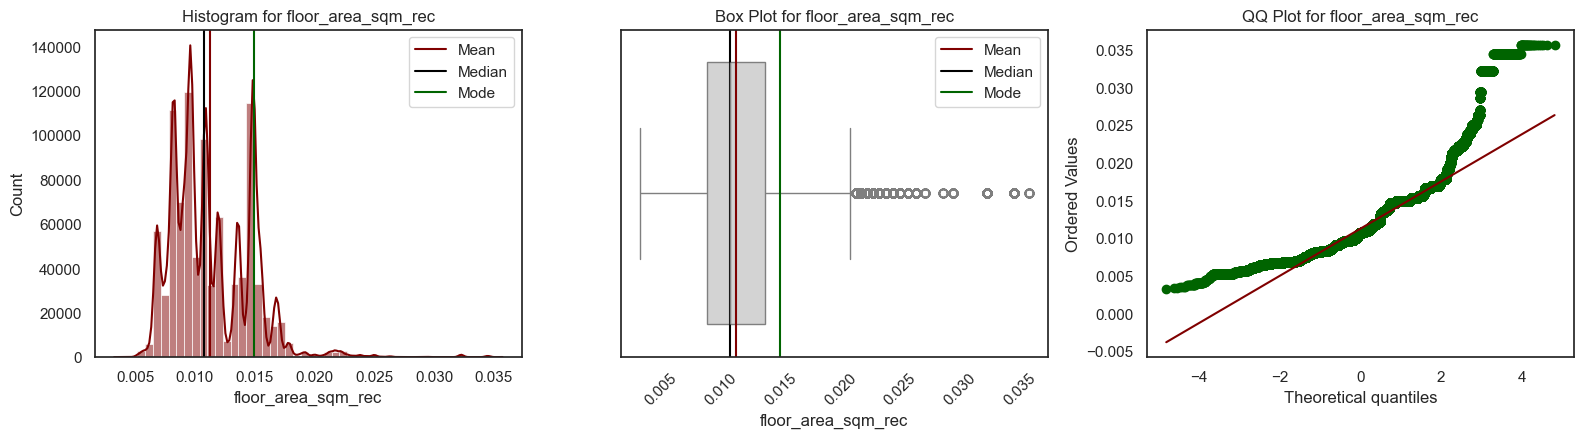



Skew for floor_area_sqm_rec is 1.10

Kurtosis for floor_area_sqm_rec is 3.00




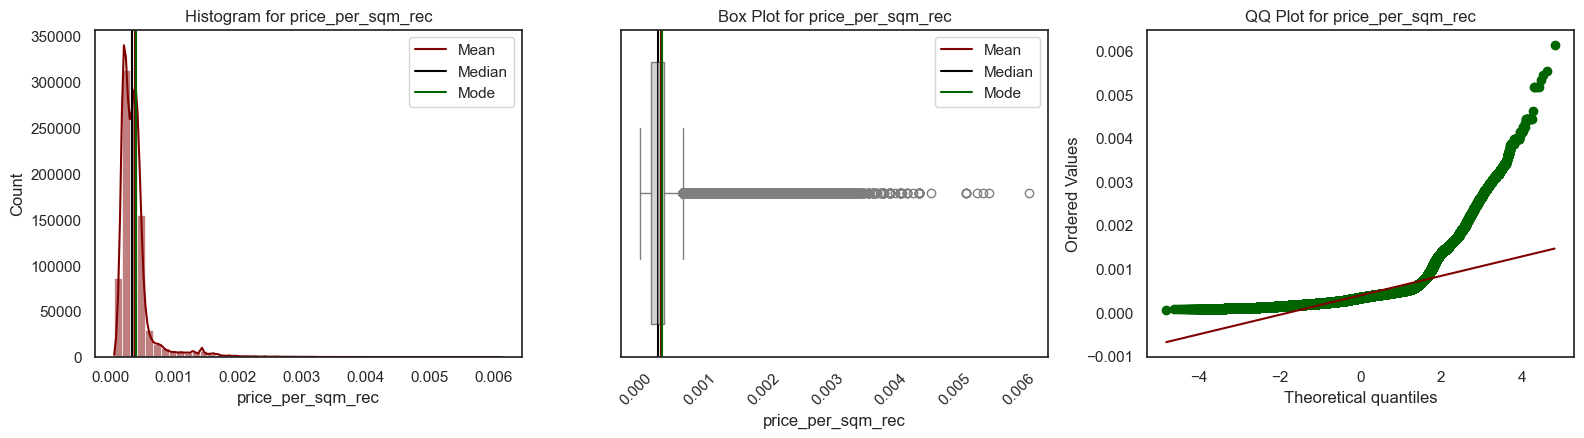



Skew for price_per_sqm_rec is 4.08

Kurtosis for price_per_sqm_rec is 24.55




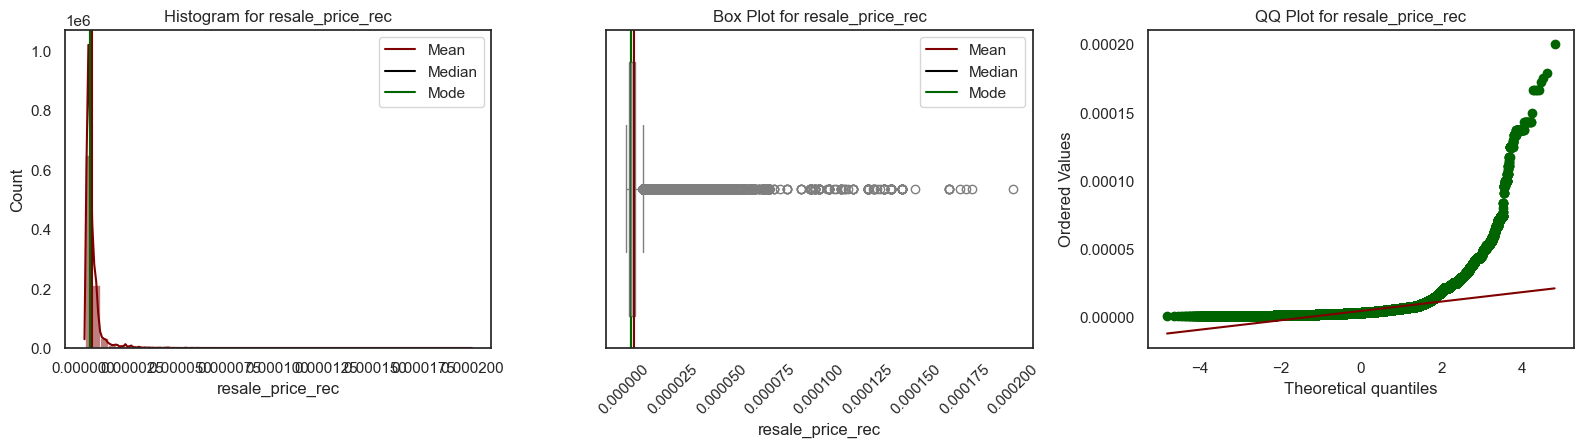



Skew for resale_price_rec is 7.24

Kurtosis for resale_price_rec is 112.40




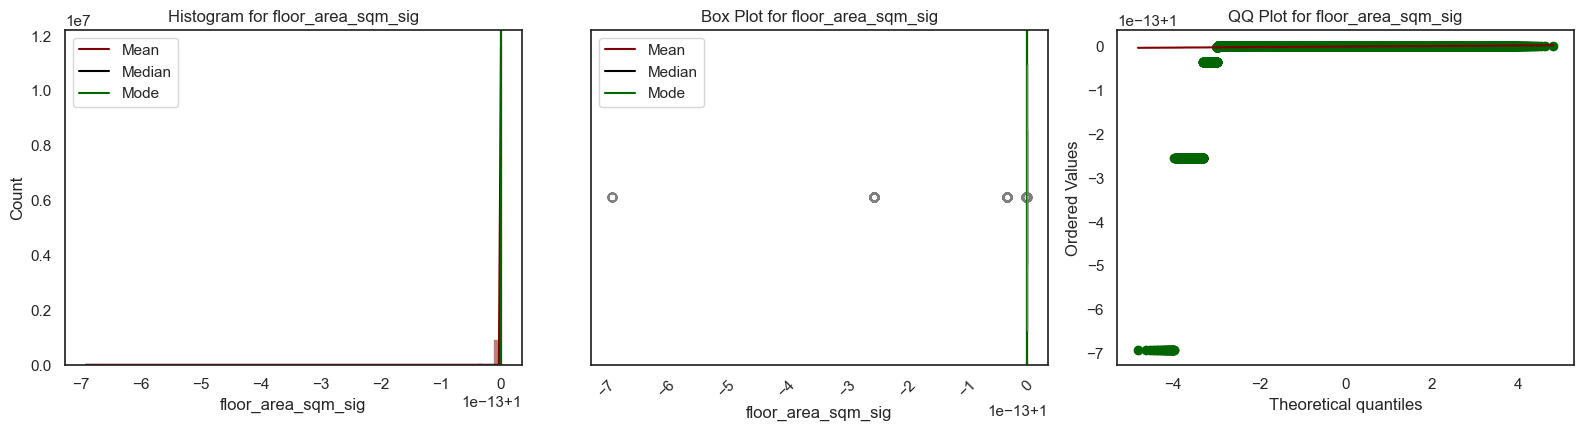



Skew for floor_area_sqm_sig is 0.00

Kurtosis for floor_area_sqm_sig is 0.00




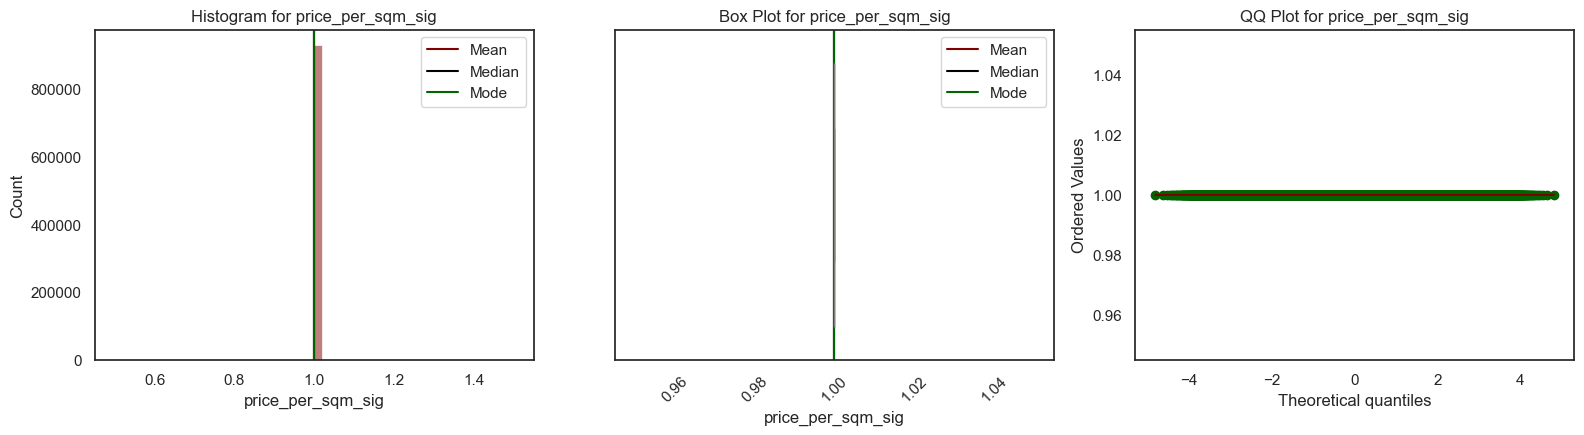



Skew for price_per_sqm_sig is 0.00

Kurtosis for price_per_sqm_sig is 0.00




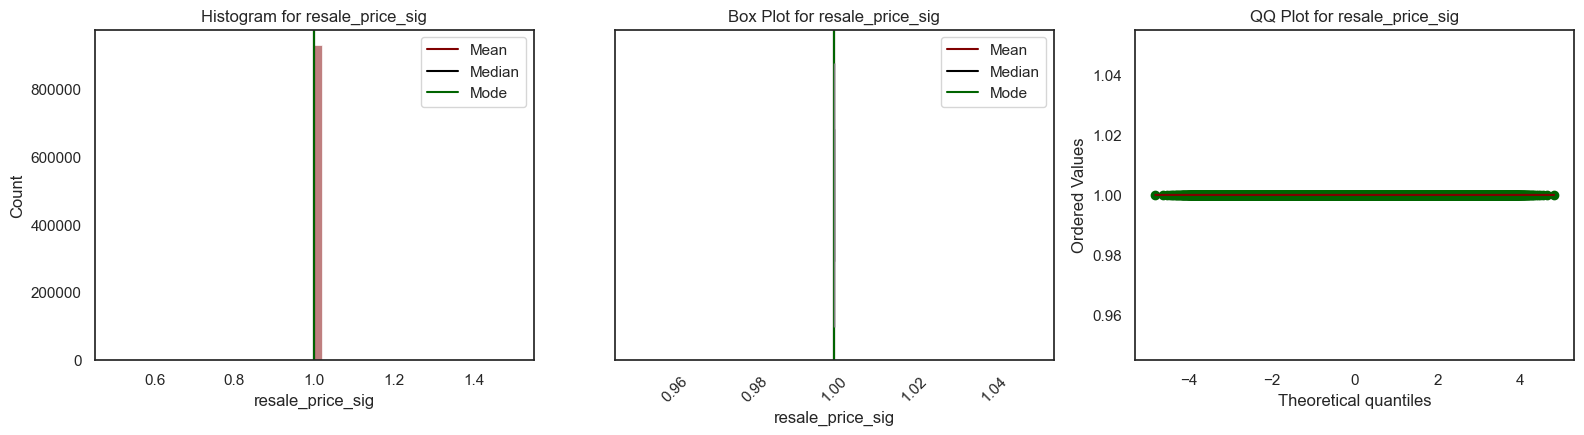



Skew for resale_price_sig is 0.00

Kurtosis for resale_price_sig is 0.00




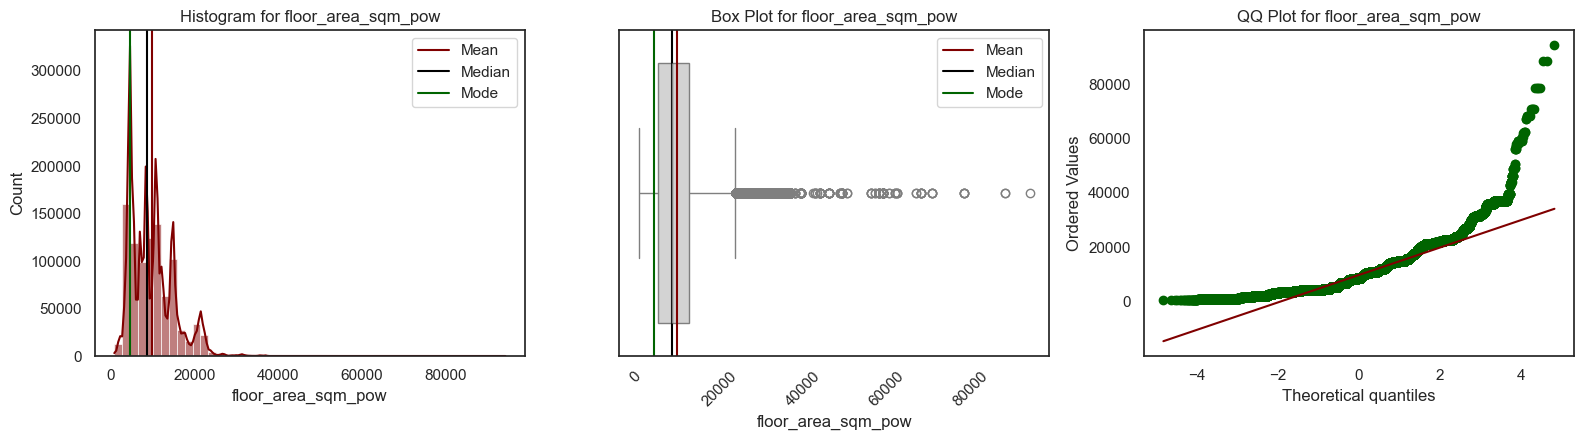



Skew for floor_area_sqm_pow is 1.00

Kurtosis for floor_area_sqm_pow is 1.66




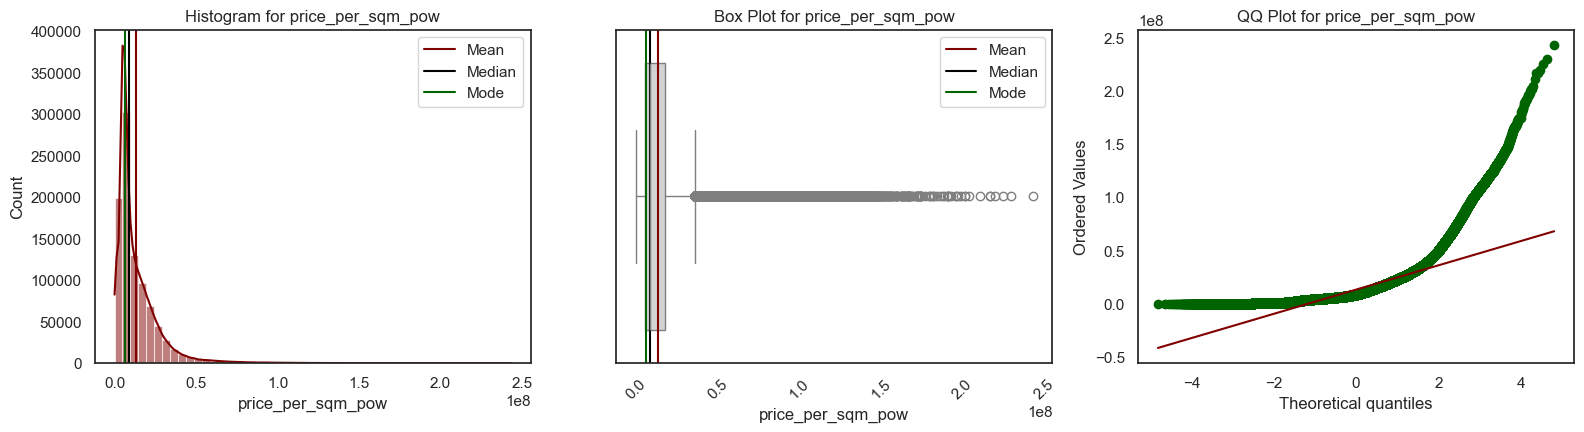



Skew for price_per_sqm_pow is 2.98

Kurtosis for price_per_sqm_pow is 14.96




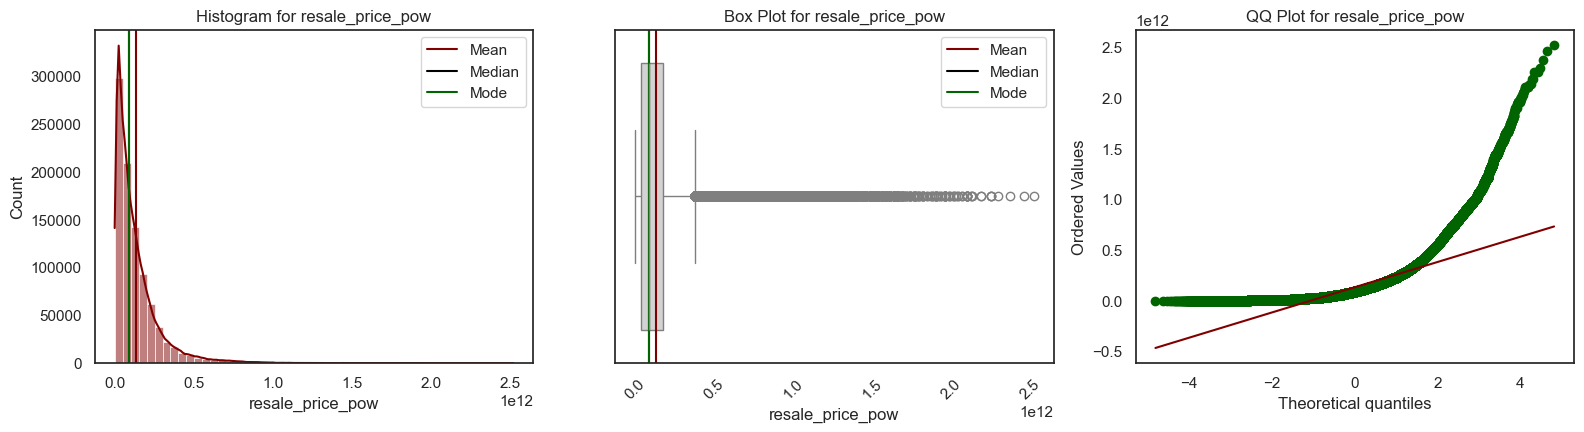



Skew for resale_price_pow is 2.81

Kurtosis for resale_price_pow is 13.23




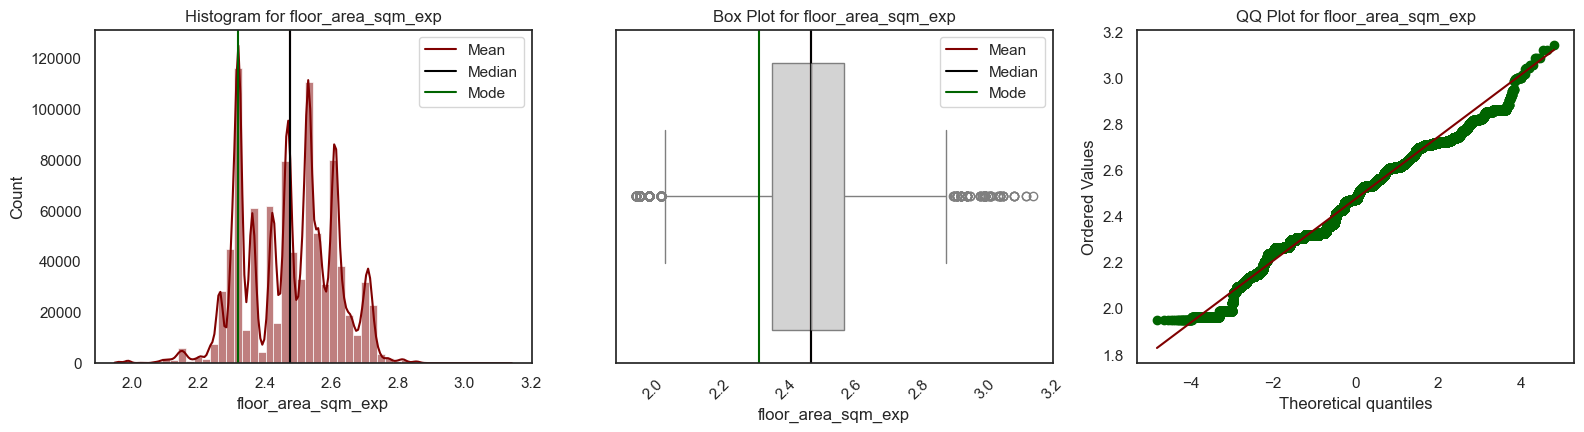



Skew for floor_area_sqm_exp is -0.11

Kurtosis for floor_area_sqm_exp is -0.50




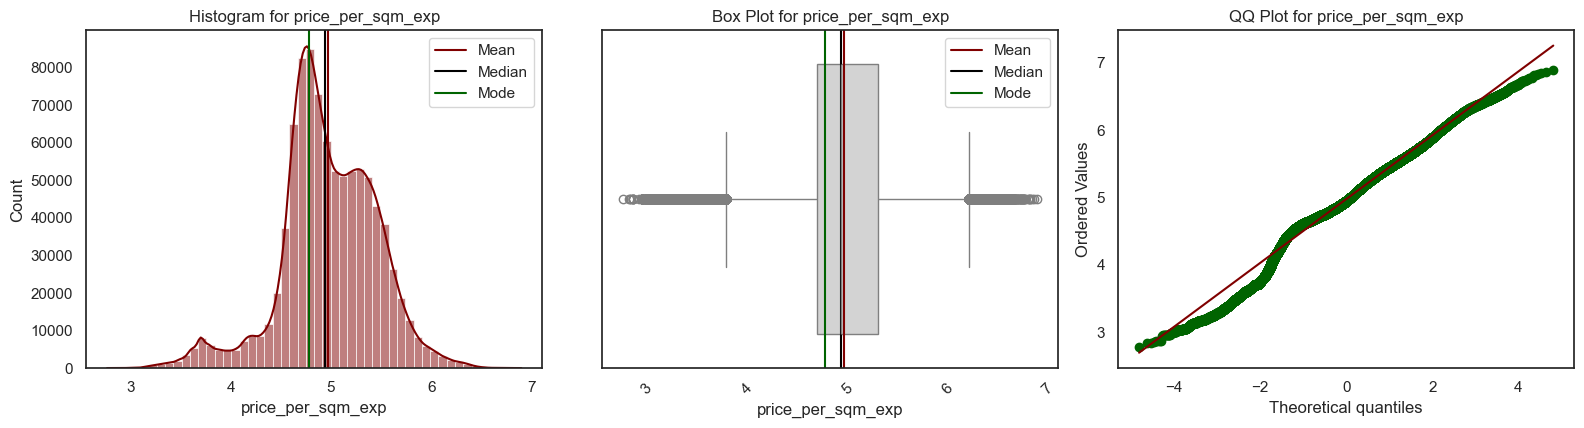



Skew for price_per_sqm_exp is -0.37

Kurtosis for price_per_sqm_exp is 0.93




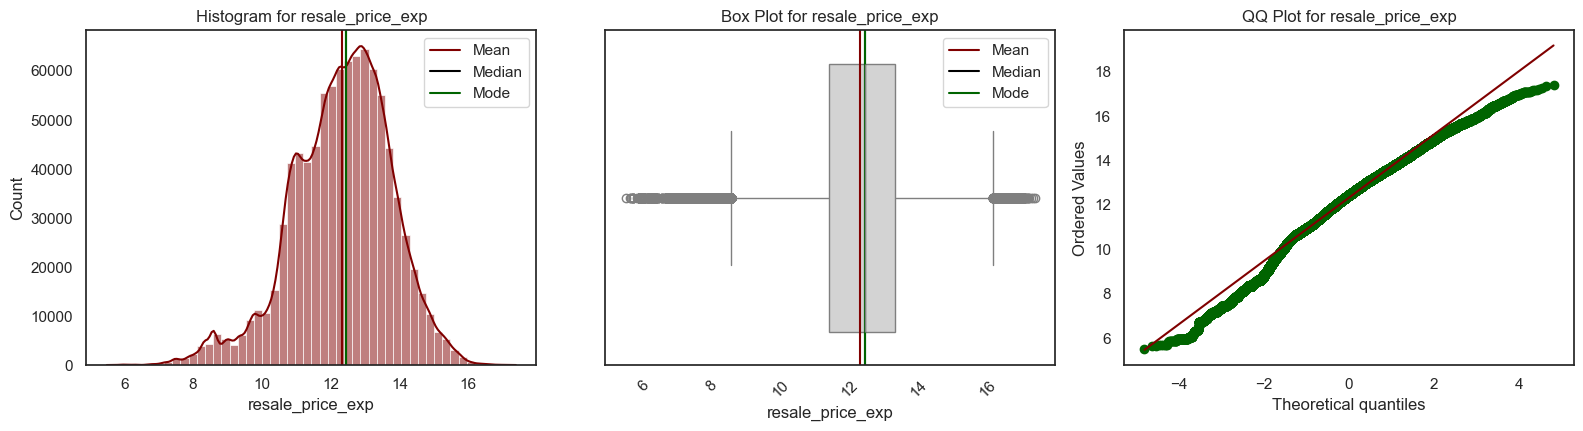



Skew for resale_price_exp is -0.46

Kurtosis for resale_price_exp is 0.48




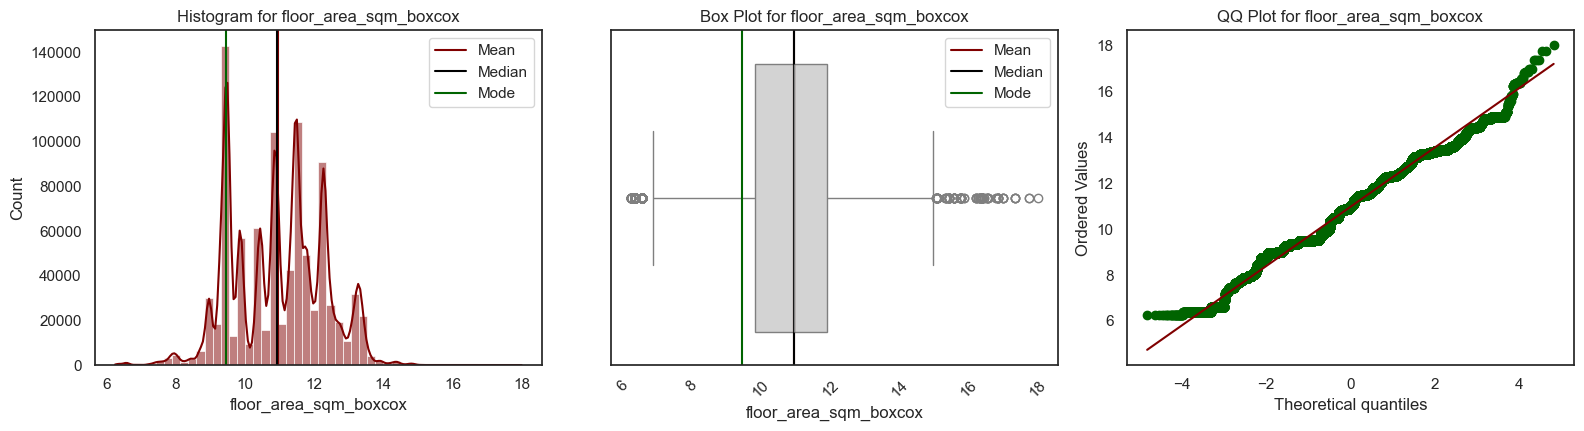



Skew for floor_area_sqm_boxcox is -0.02

Kurtosis for floor_area_sqm_boxcox is -0.55




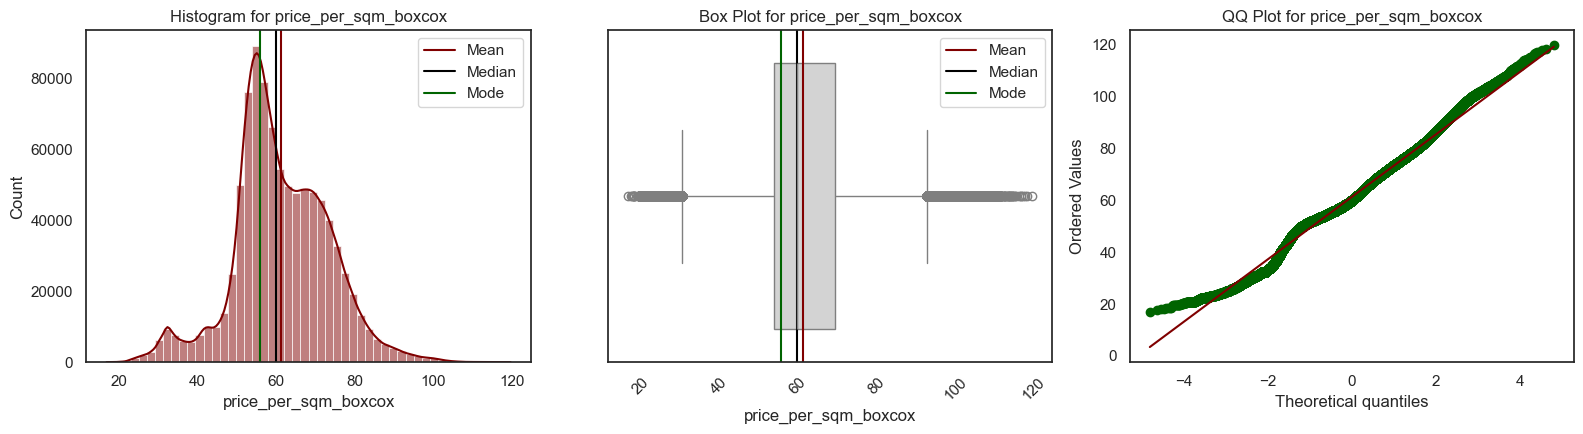



Skew for price_per_sqm_boxcox is 0.04

Kurtosis for price_per_sqm_boxcox is 0.57




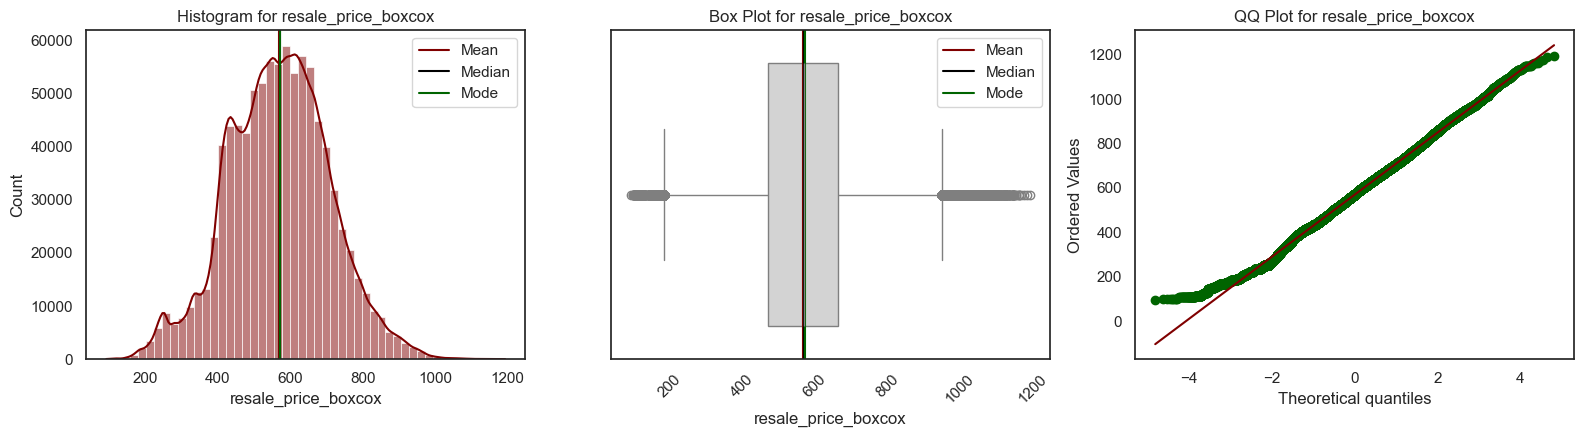



Skew for resale_price_boxcox is -0.00

Kurtosis for resale_price_boxcox is 0.05


Skewness:
 {'floor_area_sqm_log': -0.23334554320679685, 'price_per_sqm_log': -0.818957703657442, 'resale_price_log': -0.9240431018462586, 'floor_area_sqm_square': 0.07508519415665621, 'price_per_sqm_square': 0.21658695169899023, 'resale_price_square': 0.1091846481909032, 'floor_area_sqm_rec': 1.1036739071114499, 'price_per_sqm_rec': 4.084996627408017, 'resale_price_rec': 7.243328942541449, 'floor_area_sqm_sig': 0.0, 'price_per_sqm_sig': 0.0, 'resale_price_sig': 0.0, 'floor_area_sqm_pow': 1.0026335207311052, 'price_per_sqm_pow': 2.9848945626162613, 'resale_price_pow': 2.810519042318629, 'floor_area_sqm_exp': -0.10569700415544024, 'price_per_sqm_exp': -0.3692294390682086, 'resale_price_exp': -0.4641821320745707, 'floor_area_sqm_boxcox': -0.017189794906269432, 'price_per_sqm_boxcox': 0.03795420878646502, 'resale_price_boxcox': -0.0005539777473695307} 

 Kurtois:
 {'floor_area_sqm_log': -0.3577004192758224,

In [273]:
transformed_skewness = {}
transformed_kurtosis = {}
for i in normalized_df_cleaned.columns:
    univar_num(normalized_df_cleaned,i)
    skews=normalized_df_cleaned[i].skew()
    kurt=normalized_df_cleaned[i].kurtosis()
    transformed_skewness.update({i:skews})
    transformed_kurtosis.update({i:kurt})
    color = color_neutral
    if -0.5 <= skews <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skews <= 0.5 or -0.5 < skews < 0:
        color = color_okay  # Light Green for slightly positive or slightly negative skew
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
      
    print(f"\n\n{color}Skew for {i} is {skews:.2f}{color_neutral}")    
    print(f"\n{color}Kurtosis for {i} is {kurt:.2f}{color_neutral}\n\n")
print( 'Skewness:\n',transformed_skewness,'\n\n','Kurtois:\n',transformed_kurtosis)

In [ ]:
df1.sample(5)

In [ ]:
df1.sample(5)